In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
import warnings
import random

In [ ]:
warnings.filterwarnings("ignore")

#Clustering

In [ ]:
# import re
# from bs4 import BeautifulSoup

In [ ]:
import json
# import re
# from bs4 import BeautifulSoup

# Load JSON
json_path = "/content/drive/MyDrive/DS Project  -  Green_Software papers/Posts from keyword/JSON/out_drain-bat_norm.json"

with open(json_path, "r") as f:
    data = json.load(f)  # Use json.load() instead of json.loads()

df = pd.DataFrame(data)

In [ ]:
df

,title,body,tags,user_id,username,embedding,cosine_sim_score,euclidian_dis_score,l2_norm_embedding
0,Python - Lists checking if something has been ...,"<p>Okay, so I am creating a program in python ...",python|list,5582341,Thom9son,"[-0.006309993099421263, 0.00356353260576725, 0...",0.672337,0.809522,"[-0.0063099929711569564, 0.0035635325333307146..."
1,enabling foreground mode on NFC could cause dr...,<p>Quoting Carl Sagan:</p>\n\n<blockquote>\n ...,android|nfc,1348187,Rafael Ruiz Muñoz,"[-0.008700602687895298, 0.024448204785585403, ...",0.714424,0.755746,"[-0.008700602476254534, 0.024448204190886745, ..."
2,Android CPU awake and Battery Depletion due to...,<p>I am working on an Sensors App that needs t...,android|service|android-volley|android-sensors...,4259011,Theodore Samuel,"[-0.012620874680578709, 0.007086478173732758, ...",0.724840,0.741836,"[-0.012620874944282136, 0.0070864783217992455,..."
3,Stop endless buffering of html5 video in cordo...,<p>I am building a cross-platform mobile app u...,android|cordova|android-webview|html5-video|co...,3289788,Waino,"[-0.013198873028159142, 0.004360640421509743, ...",0.694337,0.781874,"[-0.013198873411275198, 0.004360640548083531, ..."
4,low level bluetooth broadcast,"<p>Since bluetooth is a broadcast protocol, is...",android|bluetooth|low-level|at-command,582004,liucheia,"[-0.006125195883214474, 0.006943251937627792, ...",0.687107,0.791066,"[-0.00612519555523584, 0.006943251565845677, 0..."
...,...,...,...,...,...,...,...,...,...
1204,Stop Android Service after some time?,<p>I have a background service in my app whic...,android|service,3013161,Slim C.,"[-0.01054888404905796, 0.01150911208242178, -0...",0.688413,0.789414,"[-0.010548884744092471, 0.011509112840722853, ..."
1205,startService restart my service if currently r...,"<p>in my service, I download a lot of stuff fr...",android|service,327402,Waza_Be,"[-0.013683325611054897, 0.007822937332093716, ...",0.710380,0.761078,"[-0.013683326543242016, 0.00782293786503736, -..."
1206,Android service - keep checking the current ti...,<p>My Android service has to keep checking if ...,android|service,1462219,Jacob,"[-0.005988565739244223, 0.0009602705831639469,...",0.677759,0.802796,"[-0.005988565812445336, 0.0009602705949017952,..."
1207,PhoneStateListener onSignalStrengthsChanged st...,<p>I'm writing simple application containing t...,android|service,465685,mih,"[-0.007816928438842297, 0.007595955394208431, ...",0.673536,0.808040,"[-0.007816928484357064, 0.007595955438436564, ..."


In [ ]:
df_yes = pd.read_csv('/content/drive/MyDrive/DS Project  -  Green_Software papers/Posts from keyword/Issue or not?/output_issue_or_not.csv')
df_yes

,title,body,tags,user_id,username,discussing_issue
0,Python - Lists checking if something has been ...,"<p>Okay, so I am creating a program in python ...",python|list,5582341,Thom9son,yes
1,enabling foreground mode on NFC could cause dr...,<p>Quoting Carl Sagan:</p>\n\n<blockquote>\n ...,android|nfc,1348187,Rafael Ruiz Muñoz,no
2,Android CPU awake and Battery Depletion due to...,<p>I am working on an Sensors App that needs t...,android|service|android-volley|android-sensors...,4259011,Theodore Samuel,yes
3,Stop endless buffering of html5 video in cordo...,<p>I am building a cross-platform mobile app u...,android|cordova|android-webview|html5-video|co...,3289788,Waino,yes
4,low level bluetooth broadcast,"<p>Since bluetooth is a broadcast protocol, is...",android|bluetooth|low-level|at-command,582004,liucheia,no
...,...,...,...,...,...,...
1204,Stop Android Service after some time?,<p>I have a background service in my app whic...,android|service,3013161,Slim C.,yes
1205,startService restart my service if currently r...,"<p>in my service, I download a lot of stuff fr...",android|service,327402,Waza_Be,yes
1206,Android service - keep checking the current ti...,<p>My Android service has to keep checking if ...,android|service,1462219,Jacob,no
1207,PhoneStateListener onSignalStrengthsChanged st...,<p>I'm writing simple application containing t...,android|service,465685,mih,no


In [ ]:
df['issue'] = df_yes['discussing_issue']
df

,title,body,tags,user_id,username,embedding,cosine_sim_score,euclidian_dis_score,l2_norm_embedding,issue
0,Python - Lists checking if something has been ...,"<p>Okay, so I am creating a program in python ...",python|list,5582341,Thom9son,"[-0.006309993099421263, 0.00356353260576725, 0...",0.672337,0.809522,"[-0.0063099929711569564, 0.0035635325333307146...",yes
1,enabling foreground mode on NFC could cause dr...,<p>Quoting Carl Sagan:</p>\n\n<blockquote>\n ...,android|nfc,1348187,Rafael Ruiz Muñoz,"[-0.008700602687895298, 0.024448204785585403, ...",0.714424,0.755746,"[-0.008700602476254534, 0.024448204190886745, ...",no
2,Android CPU awake and Battery Depletion due to...,<p>I am working on an Sensors App that needs t...,android|service|android-volley|android-sensors...,4259011,Theodore Samuel,"[-0.012620874680578709, 0.007086478173732758, ...",0.724840,0.741836,"[-0.012620874944282136, 0.0070864783217992455,...",yes
3,Stop endless buffering of html5 video in cordo...,<p>I am building a cross-platform mobile app u...,android|cordova|android-webview|html5-video|co...,3289788,Waino,"[-0.013198873028159142, 0.004360640421509743, ...",0.694337,0.781874,"[-0.013198873411275198, 0.004360640548083531, ...",yes
4,low level bluetooth broadcast,"<p>Since bluetooth is a broadcast protocol, is...",android|bluetooth|low-level|at-command,582004,liucheia,"[-0.006125195883214474, 0.006943251937627792, ...",0.687107,0.791066,"[-0.00612519555523584, 0.006943251565845677, 0...",no
...,...,...,...,...,...,...,...,...,...,...
1204,Stop Android Service after some time?,<p>I have a background service in my app whic...,android|service,3013161,Slim C.,"[-0.01054888404905796, 0.01150911208242178, -0...",0.688413,0.789414,"[-0.010548884744092471, 0.011509112840722853, ...",yes
1205,startService restart my service if currently r...,"<p>in my service, I download a lot of stuff fr...",android|service,327402,Waza_Be,"[-0.013683325611054897, 0.007822937332093716, ...",0.710380,0.761078,"[-0.013683326543242016, 0.00782293786503736, -...",yes
1206,Android service - keep checking the current ti...,<p>My Android service has to keep checking if ...,android|service,1462219,Jacob,"[-0.005988565739244223, 0.0009602705831639469,...",0.677759,0.802796,"[-0.005988565812445336, 0.0009602705949017952,...",no
1207,PhoneStateListener onSignalStrengthsChanged st...,<p>I'm writing simple application containing t...,android|service,465685,mih,"[-0.007816928438842297, 0.007595955394208431, ...",0.673536,0.808040,"[-0.007816928484357064, 0.007595955438436564, ...",no


In [ ]:
df_ori = df
df_new = (df[df['issue'] == 'yes']).reset_index(drop= True)

In [ ]:
df_new

,title,body,tags,user_id,username,embedding,cosine_sim_score,euclidian_dis_score,l2_norm_embedding,issue
0,Python - Lists checking if something has been ...,"<p>Okay, so I am creating a program in python ...",python|list,5582341,Thom9son,"[-0.006309993099421263, 0.00356353260576725, 0...",0.672337,0.809522,"[-0.0063099929711569564, 0.0035635325333307146...",yes
1,Android CPU awake and Battery Depletion due to...,<p>I am working on an Sensors App that needs t...,android|service|android-volley|android-sensors...,4259011,Theodore Samuel,"[-0.012620874680578709, 0.007086478173732758, ...",0.724840,0.741836,"[-0.012620874944282136, 0.0070864783217992455,...",yes
2,Stop endless buffering of html5 video in cordo...,<p>I am building a cross-platform mobile app u...,android|cordova|android-webview|html5-video|co...,3289788,Waino,"[-0.013198873028159142, 0.004360640421509743, ...",0.694337,0.781874,"[-0.013198873411275198, 0.004360640548083531, ...",yes
3,capacitor-community / background-geolocation r...,<p>I am trying to use capacitor-community / b...,ionic-framework|plugins|geolocation|capacitor,15580774,spardano,"[0.0031001074239611626, 0.024638498201966286, ...",0.693219,0.783301,"[0.003100107324348909, 0.02463849741028522, -0...",yes
4,Alternative to iOS's deprecated UIApplicationE...,<p>I have an app that I do NOT want to run in ...,ios|swift|background-process,4272549,123,"[-0.004911144729703665, 0.019330035895109177, ...",0.700764,0.773610,"[-0.004911144611331236, 0.019330035429200833, ...",yes
...,...,...,...,...,...,...,...,...,...,...
676,Which applications are using location service?,<p>I found that location service drain my batt...,android|location,2463173,Michal,"[-0.003722809487953782, 0.027506107464432716, ...",0.719254,0.749328,"[-0.0037228095769135496, 0.027506108121715053,...",yes
677,service that will run and stop automatically i...,<p>need a service that will run in background ...,android|service,1432009,Humayun Kabir,"[-0.005675656255334616, 0.01504851970821619, -...",0.690545,0.786709,"[-0.005675656536934327, 0.015048520454853869, ...",yes
678,Stop Android Service after some time?,<p>I have a background service in my app whic...,android|service,3013161,Slim C.,"[-0.01054888404905796, 0.01150911208242178, -0...",0.688413,0.789414,"[-0.010548884744092471, 0.011509112840722853, ...",yes
679,startService restart my service if currently r...,"<p>in my service, I download a lot of stuff fr...",android|service,327402,Waza_Be,"[-0.013683325611054897, 0.007822937332093716, ...",0.710380,0.761078,"[-0.013683326543242016, 0.00782293786503736, -...",yes


In [ ]:
df_new["embedding"] = df_new['l2_norm_embedding'].apply(np.array)
matrix = np.vstack(df_new.embedding.values)

print(matrix.shape)

(681, 1536)


In [ ]:
# from sklearn.cluster import KMeans

# n_clusters = 4

# kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
# kmeans.fit(matrix)
# labels = kmeans.labels_
# df_new["Cluster"] = labels

# # df.groupby("Cluster").Score.mean().sort_values()


set threshold

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_

distances = np.linalg.norm(matrix - kmeans.cluster_centers_[labels], axis=1)

threshold = 0.425
mask = distances <= threshold
filtered_matrix = matrix[mask]
filtered_labels = labels[mask]

df_new = df_new[mask]
df_new["Cluster"] = filtered_labels

In [ ]:
(df_new['Cluster']).value_counts()

,count
Cluster,
2,142
3,138
1,53
0,21


In [ ]:
# df_new['Cluster'] = df_new['Cluster'].apply(lambda x: 0 if x == 3 else x)

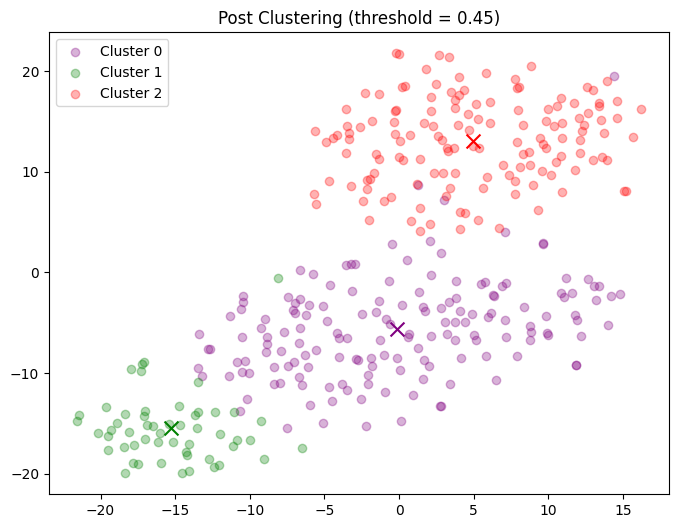

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

filtered_labels = np.where(filtered_labels == 3, 0, filtered_labels)

# Apply t-SNE **after filtering**
tsne = TSNE(n_components=2, perplexity=30, random_state=42, init="random", learning_rate=200)
vis_dims2 = tsne.fit_transform(filtered_matrix)  # Use filtered data

x = vis_dims2[:, 0]
y = vis_dims2[:, 1]

plt.figure(figsize=(8, 6))

for category, color in enumerate(["purple", "green", "red"]):  # Only 4 clusters
    mask = filtered_labels == category  # Use filtered labels
    xs, ys = x[mask], y[mask]

    plt.scatter(xs, ys, color=color, alpha=0.3, label=f"Cluster {category}")

    # Plot cluster centroids
    avg_x, avg_y = xs.mean(), ys.mean()
    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)

plt.title("Post Clustering (threshold = 0.45)")
plt.legend()
plt.show()

original plot

In [ ]:
# from sklearn.manifold import TSNE
# import matplotlib
# import matplotlib.pyplot as plt

# tsne = TSNE(n_components=2, perplexity=100, random_state=42, init="random", learning_rate=200)
# vis_dims2 = tsne.fit_transform(matrix)

# x = [x for x, y in vis_dims2]
# y = [y for x, y in vis_dims2]

# for category, color in enumerate(["purple", "green", "red", "blue", 'orange']):
#     xs = np.array(x)[df_new.Cluster == category]
#     ys = np.array(y)[df_new.Cluster == category]
#     plt.scatter(xs, ys, color=color, alpha=0.3)

#     avg_x = xs.mean()
#     avg_y = ys.mean()

#     plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
# plt.title("Clusters identified visualized in language 2d using t-SNE")

In [ ]:
df_new['body'][1]

'<p>I am working on an Sensors App that needs to measure <em>acceleration</em> and <em>position</em> every second. These measurements take place in a background <strong>Service</strong>.<br>\nFor the acceleration I use the <strong>Accelerometer Sensor</strong> and for the location the <strong>FusedLocationApi</strong> of Google Play Services.</p>\n\n<p>But as shown in the screenshots below, <strong>the CPU is always awake (why?)</strong> and the battery is depleted very quickly when the app is running. I closed the app and the Service kept running (which is what I want) during the night, and when I woke up, my battery was completely drained. Given that the wifi was turned off, the battery depletion couldn\'t be caused by the http connection.  </p>\n\n<p>So, is the accelerometer the cause?<br>\n<strong>What can be done to reduce power consumption in such a case?</strong></p>\n\n<p>Screenshots:<br>\n<a href="http://i.imgur.com/mmakRMD.png" rel="nofollow">Battery History details</a><br>\n

In [ ]:
def clean_html_and_code(text):
    # Step 1: ลบโค้ดทั้งหมดรวมถึงข้อความภายในโค้ด
    cleaned_text = re.sub(r"<code.*?>.*?</code>", "", text, flags=re.DOTALL)  # ลบโค้ดในแท็ก <code>
    cleaned_text = re.sub(r"```.*?```", "", cleaned_text, flags=re.DOTALL)  # ลบโค้ดที่ใช้ ``` ในข้อความ

    # Step 2: ใช้ BeautifulSoup ลบแท็ก HTML
    soup = BeautifulSoup(cleaned_text, "html.parser")
    cleaned_text = soup.get_text()

    # Step 3: ลบสัญลักษณ์พิเศษ HTML เช่น &amp;, &lt; เป็นต้น
    cleaned_text = re.sub(r"&[a-z]+;", "", cleaned_text)

    cleaned_text = re.sub(r"\d+", "", cleaned_text)  # ลบตัวเลขทั้งหมด

    # Step 4: ลบสัญลักษณ์ที่ไม่จำเป็น (เช่น เครื่องหมายพิเศษ)
    cleaned_text = re.sub(r"[^a-zA-Z0-9\s]", "", cleaned_text)

    # Step 5: ลบช่องว่างที่เกินมา
    cleaned_text = re.sub(r"\s+", " ", cleaned_text)

    # # Step 6: ลบ common words หรือ stop words ที่ไม่มีความหมาย
    # words = cleaned_text.split()  # แยกคำออกจากกัน
    # filtered_words = [word for word in words if word.lower() not in ENGLISH_STOP_WORDS]
    # cleaned_text = " ".join(filtered_words)  # รวมคำที่เหลือกลับมาเป็นข้อความ

    # Step 7: คืนค่าข้อความที่สะอาดขึ้น
    return cleaned_text.strip()

In [ ]:
df_new['cleaned_text'] = df_new['body'].apply(lambda x: clean_html_and_code(x))
df_new

,title,body,tags,user_id,username,embedding,cosine_sim_score,euclidian_dis_score,l2_norm_embedding,issue,Cluster,cleaned_text
1,Android CPU awake and Battery Depletion due to...,<p>I am working on an Sensors App that needs t...,android|service|android-volley|android-sensors...,4259011,Theodore Samuel,"[-0.012620874944282136, 0.0070864783217992455,...",0.724840,0.741836,"[-0.012620874944282136, 0.0070864783217992455,...",yes,3,I am working on an Sensors App that needs to m...
5,Need a push framework for android,<p>We need to achieve a push functionality in ...,android|node.js|redis|push|pusher,759783,ashutosh,"[-0.023059503819841107, 0.006168550734987391, ...",0.704314,0.769007,"[-0.023059503819841107, 0.006168550734987391, ...",yes,1,We need to achieve a push functionality in our...
6,Is FCM still better than polling when updating...,<p>I want to have some sort of notification sy...,android|ios|cordova|firebase-cloud-messaging|n...,607033,inf3rno,"[-0.0019366682430695156, 0.019377123022125655,...",0.699753,0.774915,"[-0.0019366682430695156, 0.019377123022125655,...",yes,1,I want to have some sort of notification syste...
9,How to know when a day was started in android?,<p>Is there a way to detect when a day was sta...,android|datetime|android-service|android-broad...,4264063,Jack,"[0.0014720194020822538, 0.017004572886673903, ...",0.696074,0.779649,"[0.0014720194020822538, 0.017004572886673903, ...",yes,3,Is there a way to detect when a day was starte...
12,What is the power efficient way to keep offlin...,<p>I'm building an Android client for an Inter...,android|offline-caching,1380150,Alexander Dunaev,"[-0.007778969973482725, 0.019832392261010565, ...",0.718349,0.750535,"[-0.007778969973482725, 0.019832392261010565, ...",yes,1,Im building an Android client for an Internet ...
...,...,...,...,...,...,...,...,...,...,...,...,...
675,How frequently does the Android OS itself (not...,<p>I'm looking at writing a location-aware app...,android|location,569777,MetaFight,"[-0.00670004617704119, 0.01911658555080881, -0...",0.706425,0.766257,"[-0.00670004617704119, 0.01911658555080881, -0...",yes,2,Im looking at writing a locationaware applicat...
676,Which applications are using location service?,<p>I found that location service drain my batt...,android|location,2463173,Michal,"[-0.0037228095769135496, 0.027506108121715053,...",0.719254,0.749328,"[-0.0037228095769135496, 0.027506108121715053,...",yes,2,I found that location service drain my battery...
677,service that will run and stop automatically i...,<p>need a service that will run in background ...,android|service,1432009,Humayun Kabir,"[-0.005675656536934327, 0.015048520454853869, ...",0.690545,0.786709,"[-0.005675656536934327, 0.015048520454853869, ...",yes,2,need a service that will run in background and...
678,Stop Android Service after some time?,<p>I have a background service in my app whic...,android|service,3013161,Slim C.,"[-0.010548884744092471, 0.011509112840722853, ...",0.688413,0.789414,"[-0.010548884744092471, 0.011509112840722853, ...",yes,3,I have a background service in my app which is...


In [ ]:
from openai import OpenAI
import os

cluster_name = []

client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY", "Insert OpenAI Key"))

rev_per_cluster = 5

# Merge cluster 3 with cluster 1 when n_clusters == 1
if n_clusters == 1:
    df_new.loc[df_new["Cluster"] == 3, "Cluster"] = 1

for i in range(n_clusters):
    if i == 3:  # Skip cluster 3
        continue

    print(f"Cluster {i} Theme:", end=" ")

    cluster_df = df_new[df_new.Cluster == i]

    # Ensure we sample only available rows
    sample_size = min(len(cluster_df), rev_per_cluster)

    posts = "\n".join(
        cluster_df.sample(sample_size, random_state=42)  # Safe sampling
        [['title', 'cleaned_text']]
        .apply(lambda row: f"Title: {row['title']}\nContent: {row['cleaned_text']}", axis=1)
        .values
    )

    messages = [
        {"role": "user", "content": f'What do the following posts have in common?\n\n"""\n{posts}\n"""\n\nTheme:'}
    ]

    response = client.chat.completions.create(
        model="gpt-4",
        messages=messages,
        temperature=0,
        max_tokens=64,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )
    print(response.choices[0].message.content.replace("\n", ""))
    cluster_name.append(response.choices[0].message.content.replace("\n", ""))

    sample_cluster_rows = cluster_df.sample(sample_size, random_state=42)  # Safe sampling
    for j in range(sample_size):  # Use safe sample size
        print(sample_cluster_rows.title.str[:70].values[j])

    print("-" * 100)


Cluster 0 Theme: Battery usage and power consumption in iOS applications.
Minimising an app's battery usage on iOS (while phone is locked etc)
iOS tool to measure battery drain
how to measure and improve battery use in iPhone/iPad game (Android al
Xamarin Forms Debug Battery Drain
iPhone 4 profile power consumption (with instruments)
----------------------------------------------------------------------------------------------------
Cluster 1 Theme: All the posts are related to Android development, specifically dealing with server communication and concerns about battery drain.
Android: Best way of handling continuous pulling from server?
Android SPP Bluetooth: Implement a Background connection attempt
Push Notifications in Android Platform
Do I need to stop periodic GcmTaskServices?
Implementing instant messaging in my android application
----------------------------------------------------------------------------------------------------
Cluster 2 Theme: Battery drain issues related t

In [ ]:
cluster_name

['Battery usage and power consumption in iOS applications.',
 'All the posts are related to Android development, specifically dealing with server communication and concerns about battery drain.',
 'Battery drain issues related to location services in mobile applications.']

In [ ]:
# from openai import OpenAI
# import os

# client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY", "Insert OpenAI Key"))

# rev_per_cluster = 5

# for i in range(n_clusters):
#     print(f"Cluster {i} Theme:", end=" ")

#     cluster_df = df_new[df_new.Cluster == i]

#     #Ensure we sample only available rows
#     sample_size = min(len(cluster_df), rev_per_cluster)

#     posts = "\n".join(
#         cluster_df.sample(sample_size, random_state=42)  # Safe sampling
#         [['title', 'cleaned_text']]
#         .apply(lambda row: f"Title: {row['title']}\nContent: {row['cleaned_text']}", axis=1)
#         .values
#     )

#     messages = [
#         {"role": "user", "content": f'What do the following posts have in common?\n\n"""\n{posts}\n"""\n\nTheme:'}
#     ]

#     response = client.chat.completions.create(
#         model="gpt-4",
#         messages=messages,
#         temperature=0,
#         max_tokens=64,
#         top_p=1,
#         frequency_penalty=0,
#         presence_penalty=0
#     )
#     print(response.choices[0].message.content.replace("\n", ""))

#     sample_cluster_rows = cluster_df.sample(sample_size, random_state=42)  # Safe sampling
#     for j in range(sample_size):  # Use safe sample size
#         print(sample_cluster_rows.title.str[:70].values[j])

#     print("-" * 100)


In [ ]:
cluster_df

,title,body,tags,user_id,username,embedding,cosine_sim_score,euclidian_dis_score,l2_norm_embedding,issue,Cluster,cleaned_text
18,Android: How to timeout GPS trying to find a l...,<p>Here are snippets of my code:</p>\n\n<pre><...,android|gps|locationmanager,861815,dee,"[-0.028241373470395428, 0.007216786467311423, ...",0.704765,0.768421,"[-0.028241373470395428, 0.007216786467311423, ...",yes,2,Here are snippets of my code Called by From wh...
19,GPS not updating location when device locked a...,<p>I need to create live path tracking app. I ...,android|gps|android-location|fusedlocationprov...,2361084,maddy d,"[-0.022181980030731702, 0.018391893943499802, ...",0.682941,0.796315,"[-0.022181980030731702, 0.018391893943499802, ...",yes,2,I need to create live path tracking app I have...
20,iOS: How to reduce background activity in driv...,<p>I have an app that runs in the background a...,ios|background|core-location|cllocationmanager,3643290,Parin Shah,"[0.0010513786635029457, 0.012006010794951569, ...",0.736580,0.725838,"[0.0010513786635029457, 0.012006010794951569, ...",yes,2,I have an app that runs in the background and ...
34,"Getting current Location now, not on update",<p>I'm building an app that requires your curr...,android|gps|android-gps,3482428,Blueriver,"[-0.010954755269761892, 0.036111354535700114, ...",0.686165,0.792256,"[-0.010954755269761892, 0.036111354535700114, ...",yes,2,Im building an app that requires your current ...
38,ios - Cllocation in background,<p>I am working on project in which I need to ...,ios|notifications|cllocationmanager|cllocation,1682779,Durgaprasad,"[-0.008616594655991464, 0.026695339189768852, ...",0.698462,0.776579,"[-0.008616594655991464, 0.026695339189768852, ...",yes,2,I am working on project in which I need to fir...
...,...,...,...,...,...,...,...,...,...,...,...,...
672,Android requestLocationUpdates with a 15 minut...,<p>this is the requestLocationUpdates call I a...,android|gps,726398,David,"[0.004755802367651689, 0.015339563326838494, 0...",0.672992,0.808712,"[0.004755802367651689, 0.015339563326838494, 0...",yes,2,this is the requestLocationUpdates call I am u...
674,Android GeoFencing Dwell,<p>I want to detect when a user is visiting a ...,android|location,3220953,TomCB,"[-0.0014209813397306423, 0.027012049631194326,...",0.716412,0.753110,"[-0.0014209813397306423, 0.027012049631194326,...",yes,2,I want to detect when a user is visiting a pla...
675,How frequently does the Android OS itself (not...,<p>I'm looking at writing a location-aware app...,android|location,569777,MetaFight,"[-0.00670004617704119, 0.01911658555080881, -0...",0.706425,0.766257,"[-0.00670004617704119, 0.01911658555080881, -0...",yes,2,Im looking at writing a locationaware applicat...
676,Which applications are using location service?,<p>I found that location service drain my batt...,android|location,2463173,Michal,"[-0.0037228095769135496, 0.027506108121715053,...",0.719254,0.749328,"[-0.0037228095769135496, 0.027506108121715053,...",yes,2,I found that location service drain my battery...


original

In [ ]:
# from openai import OpenAI
# import os

# client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY", "Insert OpenAI Key"))

# # Reading a review which belong to each group.
# rev_per_cluster = 5

# for i in range(n_clusters):
#     print(f"Cluster {i} Theme:", end=" ")

#     posts = "\n".join(
#     df_new[df_new.Cluster == i]
#     .sample(rev_per_cluster, random_state=42)  # Sample the posts
#     [['title', 'cleaned_text']]  # Use double square brackets to select multiple columns
#     .apply(lambda row: f"Title: {row['title']}\nContent: {row['cleaned_text']}", axis=1)
#     .values
# )


#     messages = [
#         {"role": "user", "content": f'What do the following post have in common?\n\Title of post:\n"""\n{posts}\n"""\n\nTheme:'}
#     ]

#     response = client.chat.completions.create(
#         model="gpt-4",
#         messages=messages,
#         temperature=0,
#         max_tokens=64,
#         top_p=1,
#         frequency_penalty=0,
#         presence_penalty=0)
#     print(response.choices[0].message.content.replace("\n", ""))

#     sample_cluster_rows = df_new[df_new.Cluster == i].sample(rev_per_cluster, random_state=42)
#     for j in range(rev_per_cluster):
#         # print(sample_cluster_rows.Score.values[j], end=", ")
#         # print(sample_cluster_rows.Summary.values[j], end=":   ")
#         print(sample_cluster_rows.title.str[:70].values[j])

#     print("-" * 100)


In [ ]:
df_new.reset_index(drop=True, inplace = True)

In [ ]:
df_new

,title,body,tags,user_id,username,embedding,cosine_sim_score,euclidian_dis_score,l2_norm_embedding,issue,Cluster,cleaned_text
0,Android CPU awake and Battery Depletion due to...,<p>I am working on an Sensors App that needs t...,android|service|android-volley|android-sensors...,4259011,Theodore Samuel,"[-0.012620874944282136, 0.0070864783217992455,...",0.724840,0.741836,"[-0.012620874944282136, 0.0070864783217992455,...",yes,3,I am working on an Sensors App that needs to m...
1,Need a push framework for android,<p>We need to achieve a push functionality in ...,android|node.js|redis|push|pusher,759783,ashutosh,"[-0.023059503819841107, 0.006168550734987391, ...",0.704314,0.769007,"[-0.023059503819841107, 0.006168550734987391, ...",yes,1,We need to achieve a push functionality in our...
2,Is FCM still better than polling when updating...,<p>I want to have some sort of notification sy...,android|ios|cordova|firebase-cloud-messaging|n...,607033,inf3rno,"[-0.0019366682430695156, 0.019377123022125655,...",0.699753,0.774915,"[-0.0019366682430695156, 0.019377123022125655,...",yes,1,I want to have some sort of notification syste...
3,How to know when a day was started in android?,<p>Is there a way to detect when a day was sta...,android|datetime|android-service|android-broad...,4264063,Jack,"[0.0014720194020822538, 0.017004572886673903, ...",0.696074,0.779649,"[0.0014720194020822538, 0.017004572886673903, ...",yes,3,Is there a way to detect when a day was starte...
4,What is the power efficient way to keep offlin...,<p>I'm building an Android client for an Inter...,android|offline-caching,1380150,Alexander Dunaev,"[-0.007778969973482725, 0.019832392261010565, ...",0.718349,0.750535,"[-0.007778969973482725, 0.019832392261010565, ...",yes,1,Im building an Android client for an Internet ...
...,...,...,...,...,...,...,...,...,...,...,...,...
349,How frequently does the Android OS itself (not...,<p>I'm looking at writing a location-aware app...,android|location,569777,MetaFight,"[-0.00670004617704119, 0.01911658555080881, -0...",0.706425,0.766257,"[-0.00670004617704119, 0.01911658555080881, -0...",yes,2,Im looking at writing a locationaware applicat...
350,Which applications are using location service?,<p>I found that location service drain my batt...,android|location,2463173,Michal,"[-0.0037228095769135496, 0.027506108121715053,...",0.719254,0.749328,"[-0.0037228095769135496, 0.027506108121715053,...",yes,2,I found that location service drain my battery...
351,service that will run and stop automatically i...,<p>need a service that will run in background ...,android|service,1432009,Humayun Kabir,"[-0.005675656536934327, 0.015048520454853869, ...",0.690545,0.786709,"[-0.005675656536934327, 0.015048520454853869, ...",yes,2,need a service that will run in background and...
352,Stop Android Service after some time?,<p>I have a background service in my app whic...,android|service,3013161,Slim C.,"[-0.010548884744092471, 0.011509112840722853, ...",0.688413,0.789414,"[-0.010548884744092471, 0.011509112840722853, ...",yes,3,I have a background service in my app which is...


In [ ]:
df_new['Cluster'][df_new['Cluster'] == 3] = 0

In [ ]:
df_new["Cluster_Name"] = df_new["Cluster"].map(lambda x: cluster_name[x])

In [ ]:
df_new

,title,body,tags,user_id,username,embedding,cosine_sim_score,euclidian_dis_score,l2_norm_embedding,issue,Cluster,cleaned_text,Cluster_Name
0,Android CPU awake and Battery Depletion due to...,<p>I am working on an Sensors App that needs t...,android|service|android-volley|android-sensors...,4259011,Theodore Samuel,"[-0.012620874944282136, 0.0070864783217992455,...",0.724840,0.741836,"[-0.012620874944282136, 0.0070864783217992455,...",yes,0,I am working on an Sensors App that needs to m...,Battery usage and power consumption in iOS app...
1,Need a push framework for android,<p>We need to achieve a push functionality in ...,android|node.js|redis|push|pusher,759783,ashutosh,"[-0.023059503819841107, 0.006168550734987391, ...",0.704314,0.769007,"[-0.023059503819841107, 0.006168550734987391, ...",yes,1,We need to achieve a push functionality in our...,All the posts are related to Android developme...
2,Is FCM still better than polling when updating...,<p>I want to have some sort of notification sy...,android|ios|cordova|firebase-cloud-messaging|n...,607033,inf3rno,"[-0.0019366682430695156, 0.019377123022125655,...",0.699753,0.774915,"[-0.0019366682430695156, 0.019377123022125655,...",yes,1,I want to have some sort of notification syste...,All the posts are related to Android developme...
3,How to know when a day was started in android?,<p>Is there a way to detect when a day was sta...,android|datetime|android-service|android-broad...,4264063,Jack,"[0.0014720194020822538, 0.017004572886673903, ...",0.696074,0.779649,"[0.0014720194020822538, 0.017004572886673903, ...",yes,0,Is there a way to detect when a day was starte...,Battery usage and power consumption in iOS app...
4,What is the power efficient way to keep offlin...,<p>I'm building an Android client for an Inter...,android|offline-caching,1380150,Alexander Dunaev,"[-0.007778969973482725, 0.019832392261010565, ...",0.718349,0.750535,"[-0.007778969973482725, 0.019832392261010565, ...",yes,1,Im building an Android client for an Internet ...,All the posts are related to Android developme...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,How frequently does the Android OS itself (not...,<p>I'm looking at writing a location-aware app...,android|location,569777,MetaFight,"[-0.00670004617704119, 0.01911658555080881, -0...",0.706425,0.766257,"[-0.00670004617704119, 0.01911658555080881, -0...",yes,2,Im looking at writing a locationaware applicat...,Battery drain issues related to location servi...
350,Which applications are using location service?,<p>I found that location service drain my batt...,android|location,2463173,Michal,"[-0.0037228095769135496, 0.027506108121715053,...",0.719254,0.749328,"[-0.0037228095769135496, 0.027506108121715053,...",yes,2,I found that location service drain my battery...,Battery drain issues related to location servi...
351,service that will run and stop automatically i...,<p>need a service that will run in background ...,android|service,1432009,Humayun Kabir,"[-0.005675656536934327, 0.015048520454853869, ...",0.690545,0.786709,"[-0.005675656536934327, 0.015048520454853869, ...",yes,2,need a service that will run in background and...,Battery drain issues related to location servi...
352,Stop Android Service after some time?,<p>I have a background service in my app whic...,android|service,3013161,Slim C.,"[-0.010548884744092471, 0.011509112840722853, ...",0.688413,0.789414,"[-0.010548884744092471, 0.011509112840722853, ...",yes,0,I have a background service in my app which is...,Battery usage and power consumption in iOS app...


In [ ]:
# df_new.to_csv('data_without_noise.csv')

NameError: name 'df_new' is not defined

In [ ]:
test = pd.read_csv('/content/data_without_noise.csv')

In [ ]:
df_new

,title,body,tags,user_id,username,embedding,cosine_sim_score,euclidian_dis_score,l2_norm_embedding,issue,Cluster,cleaned_text,Cluster_Name
0,Android CPU awake and Battery Depletion due to...,<p>I am working on an Sensors App that needs t...,android|service|android-volley|android-sensors...,4259011,Theodore Samuel,"[-0.012620874944282136, 0.0070864783217992455,...",0.724840,0.741836,"[-0.012620874944282136, 0.0070864783217992455,...",yes,0,I am working on an Sensors App that needs to m...,Battery usage and power consumption in iOS app...
1,Need a push framework for android,<p>We need to achieve a push functionality in ...,android|node.js|redis|push|pusher,759783,ashutosh,"[-0.023059503819841107, 0.006168550734987391, ...",0.704314,0.769007,"[-0.023059503819841107, 0.006168550734987391, ...",yes,1,We need to achieve a push functionality in our...,All the posts are related to Android developme...
2,Is FCM still better than polling when updating...,<p>I want to have some sort of notification sy...,android|ios|cordova|firebase-cloud-messaging|n...,607033,inf3rno,"[-0.0019366682430695156, 0.019377123022125655,...",0.699753,0.774915,"[-0.0019366682430695156, 0.019377123022125655,...",yes,1,I want to have some sort of notification syste...,All the posts are related to Android developme...
3,How to know when a day was started in android?,<p>Is there a way to detect when a day was sta...,android|datetime|android-service|android-broad...,4264063,Jack,"[0.0014720194020822538, 0.017004572886673903, ...",0.696074,0.779649,"[0.0014720194020822538, 0.017004572886673903, ...",yes,0,Is there a way to detect when a day was starte...,Battery usage and power consumption in iOS app...
4,What is the power efficient way to keep offlin...,<p>I'm building an Android client for an Inter...,android|offline-caching,1380150,Alexander Dunaev,"[-0.007778969973482725, 0.019832392261010565, ...",0.718349,0.750535,"[-0.007778969973482725, 0.019832392261010565, ...",yes,1,Im building an Android client for an Internet ...,All the posts are related to Android developme...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,How frequently does the Android OS itself (not...,<p>I'm looking at writing a location-aware app...,android|location,569777,MetaFight,"[-0.00670004617704119, 0.01911658555080881, -0...",0.706425,0.766257,"[-0.00670004617704119, 0.01911658555080881, -0...",yes,2,Im looking at writing a locationaware applicat...,Battery drain issues related to location servi...
350,Which applications are using location service?,<p>I found that location service drain my batt...,android|location,2463173,Michal,"[-0.0037228095769135496, 0.027506108121715053,...",0.719254,0.749328,"[-0.0037228095769135496, 0.027506108121715053,...",yes,2,I found that location service drain my battery...,Battery drain issues related to location servi...
351,service that will run and stop automatically i...,<p>need a service that will run in background ...,android|service,1432009,Humayun Kabir,"[-0.005675656536934327, 0.015048520454853869, ...",0.690545,0.786709,"[-0.005675656536934327, 0.015048520454853869, ...",yes,2,need a service that will run in background and...,Battery drain issues related to location servi...
352,Stop Android Service after some time?,<p>I have a background service in my app whic...,android|service,3013161,Slim C.,"[-0.010548884744092471, 0.011509112840722853, ...",0.688413,0.789414,"[-0.010548884744092471, 0.011509112840722853, ...",yes,0,I have a background service in my app which is...,Battery usage and power consumption in iOS app...


In [ ]:
bigquery_data = pd.read_csv('/content/additional.csv')
bigquery_data

,title,post_body,owner_username,tags,view_count,favourite_count,post_score,creation_date,last_activity_date,answer_count,...,answer_score,answer_favorite_count,answer_comment_count,answer_create_date,answer_last_activity,answer_owner_username,comment_body,comment_score,comment_create_date,comment_owner_username
0,"""Tried to send a platform message to Flutter, ...",<p>I'm trying to build an app that uses some p...,Marcelo Pinheiro Montanher,android|flutter|dart|service|background,10742,4.0,31,2020-05-21 12:49:04.973000 UTC,2022-07-12 09:04:39.810000 UTC,5,...,1.0,NaN,0.0,2021-05-27 12:00:30.450000 UTC,2021-05-27 12:00:30.450000 UTC,junaidh haneef,NaN,NaN,NaN,NaN
1,"""Tried to send a platform message to Flutter, ...",<p>I'm trying to build an app that uses some p...,Marcelo Pinheiro Montanher,android|flutter|dart|service|background,10742,4.0,31,2020-05-21 12:49:04.973000 UTC,2022-07-12 09:04:39.810000 UTC,5,...,0.0,NaN,0.0,2020-12-03 10:31:31.130000 UTC,2020-12-03 10:31:31.130000 UTC,JRJR,NaN,NaN,NaN,NaN
2,"""Tried to send a platform message to Flutter, ...",<p>I'm trying to build an app that uses some p...,Marcelo Pinheiro Montanher,android|flutter|dart|service|background,10742,4.0,31,2020-05-21 12:49:04.973000 UTC,2022-07-12 09:04:39.810000 UTC,5,...,2.0,NaN,0.0,2021-11-11 21:35:59.530000 UTC,2022-07-12 09:04:39.810000 UTC,Ben Butterworth,NaN,NaN,NaN,NaN
3,"""Tried to send a platform message to Flutter, ...",<p>I'm trying to build an app that uses some p...,Marcelo Pinheiro Montanher,android|flutter|dart|service|background,10742,4.0,31,2020-05-21 12:49:04.973000 UTC,2022-07-12 09:04:39.810000 UTC,5,...,0.0,NaN,0.0,2020-11-25 07:06:29.253000 UTC,2020-11-25 07:06:29.253000 UTC,Ali ÜSTÜNEL,NaN,NaN,NaN,NaN
4,"""Tried to send a platform message to Flutter, ...",<p>I'm trying to build an app that uses some p...,Marcelo Pinheiro Montanher,android|flutter|dart|service|background,10742,4.0,31,2020-05-21 12:49:04.973000 UTC,2022-07-12 09:04:39.810000 UTC,5,...,0.0,NaN,0.0,2020-11-25 07:02:49.520000 UTC,2020-11-25 07:02:49.520000 UTC,Ali ÜSTÜNEL,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3037,what is the battery drain for sending one http...,<p>I want to know how much of the battery is d...,Samyak Bhuta,iphone|ios|optimization|power-management,739,1.0,3,2011-12-06 08:50:50.083000 UTC,2012-06-07 17:05:25.203000 UTC,2,...,1.0,NaN,0.0,2011-12-06 09:09:17.837000 UTC,2011-12-06 09:09:17.837000 UTC,sosborn,NaN,NaN,NaN,NaN
3038,what is the battery drain for sending one http...,<p>I want to know how much of the battery is d...,Samyak Bhuta,iphone|ios|optimization|power-management,739,1.0,3,2011-12-06 08:50:50.083000 UTC,2012-06-07 17:05:25.203000 UTC,2,...,5.0,NaN,0.0,2011-12-06 09:08:22.503000 UTC,2011-12-06 09:08:22.503000 UTC,Claus Broch,NaN,NaN,NaN,NaN
3039,what technology used in mobile chat apps to re...,<p>I'm some kind of backend developer and don'...,rzlvmp,android|ios|chat|messaging,170,NaN,-2,2021-09-07 07:39:11.227000 UTC,2021-09-07 12:42:53.063000 UTC,1,...,1.0,NaN,0.0,2021-09-07 12:42:53.063000 UTC,2021-09-07 12:42:53.063000 UTC,Saifullah ilyas,NaN,NaN,NaN,NaN
3040,why android alarm receiver is not working,<p>I downloaded the scheduler example from and...,USKMobility,android,2712,NaN,2,2013-12-30 12:42:07.077000 UTC,2016-03-31 12:34:32.330000 UTC,2,...,0.0,NaN,0.0,2016-03-31 12:34:32.330000 UTC,2016-03-31 12:34:32.330000 UTC,iOSAndroidWindowsMobileAppsDev,NaN,NaN,NaN,NaN


In [ ]:
bigquery_data.rename(columns = {'answer_last_activity' : 'accepted_date'})

,title,post_body,owner_username,tags,view_count,favourite_count,post_score,creation_date,last_activity_date,answer_count,...,answer_score,answer_favorite_count,answer_comment_count,answer_create_date,accepted_date,answer_owner_username,comment_body,comment_score,comment_create_date,comment_owner_username
0,"""Tried to send a platform message to Flutter, ...",<p>I'm trying to build an app that uses some p...,Marcelo Pinheiro Montanher,android|flutter|dart|service|background,10742,4.0,31,2020-05-21 12:49:04.973000 UTC,2022-07-12 09:04:39.810000 UTC,5,...,1.0,NaN,0.0,2021-05-27 12:00:30.450000 UTC,2021-05-27 12:00:30.450000 UTC,junaidh haneef,NaN,NaN,NaN,NaN
1,"""Tried to send a platform message to Flutter, ...",<p>I'm trying to build an app that uses some p...,Marcelo Pinheiro Montanher,android|flutter|dart|service|background,10742,4.0,31,2020-05-21 12:49:04.973000 UTC,2022-07-12 09:04:39.810000 UTC,5,...,0.0,NaN,0.0,2020-12-03 10:31:31.130000 UTC,2020-12-03 10:31:31.130000 UTC,JRJR,NaN,NaN,NaN,NaN
2,"""Tried to send a platform message to Flutter, ...",<p>I'm trying to build an app that uses some p...,Marcelo Pinheiro Montanher,android|flutter|dart|service|background,10742,4.0,31,2020-05-21 12:49:04.973000 UTC,2022-07-12 09:04:39.810000 UTC,5,...,2.0,NaN,0.0,2021-11-11 21:35:59.530000 UTC,2022-07-12 09:04:39.810000 UTC,Ben Butterworth,NaN,NaN,NaN,NaN
3,"""Tried to send a platform message to Flutter, ...",<p>I'm trying to build an app that uses some p...,Marcelo Pinheiro Montanher,android|flutter|dart|service|background,10742,4.0,31,2020-05-21 12:49:04.973000 UTC,2022-07-12 09:04:39.810000 UTC,5,...,0.0,NaN,0.0,2020-11-25 07:06:29.253000 UTC,2020-11-25 07:06:29.253000 UTC,Ali ÜSTÜNEL,NaN,NaN,NaN,NaN
4,"""Tried to send a platform message to Flutter, ...",<p>I'm trying to build an app that uses some p...,Marcelo Pinheiro Montanher,android|flutter|dart|service|background,10742,4.0,31,2020-05-21 12:49:04.973000 UTC,2022-07-12 09:04:39.810000 UTC,5,...,0.0,NaN,0.0,2020-11-25 07:02:49.520000 UTC,2020-11-25 07:02:49.520000 UTC,Ali ÜSTÜNEL,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3037,what is the battery drain for sending one http...,<p>I want to know how much of the battery is d...,Samyak Bhuta,iphone|ios|optimization|power-management,739,1.0,3,2011-12-06 08:50:50.083000 UTC,2012-06-07 17:05:25.203000 UTC,2,...,1.0,NaN,0.0,2011-12-06 09:09:17.837000 UTC,2011-12-06 09:09:17.837000 UTC,sosborn,NaN,NaN,NaN,NaN
3038,what is the battery drain for sending one http...,<p>I want to know how much of the battery is d...,Samyak Bhuta,iphone|ios|optimization|power-management,739,1.0,3,2011-12-06 08:50:50.083000 UTC,2012-06-07 17:05:25.203000 UTC,2,...,5.0,NaN,0.0,2011-12-06 09:08:22.503000 UTC,2011-12-06 09:08:22.503000 UTC,Claus Broch,NaN,NaN,NaN,NaN
3039,what technology used in mobile chat apps to re...,<p>I'm some kind of backend developer and don'...,rzlvmp,android|ios|chat|messaging,170,NaN,-2,2021-09-07 07:39:11.227000 UTC,2021-09-07 12:42:53.063000 UTC,1,...,1.0,NaN,0.0,2021-09-07 12:42:53.063000 UTC,2021-09-07 12:42:53.063000 UTC,Saifullah ilyas,NaN,NaN,NaN,NaN
3040,why android alarm receiver is not working,<p>I downloaded the scheduler example from and...,USKMobility,android,2712,NaN,2,2013-12-30 12:42:07.077000 UTC,2016-03-31 12:34:32.330000 UTC,2,...,0.0,NaN,0.0,2016-03-31 12:34:32.330000 UTC,2016-03-31 12:34:32.330000 UTC,iOSAndroidWindowsMobileAppsDev,NaN,NaN,NaN,NaN


In [ ]:
bigquery_clean = bigquery_data[bigquery_data['title'].isin(df_new['title'])]
bigquery_clean = bigquery_clean.merge(df_new[['title', 'Cluster', 'Cluster_Name']], on='title', how='left')
# bigquery_clean['Cluster'][bigquery_clean['Cluster'] == 3] = 0
bigquery_clean.reset_index(inplace = True, drop = True)
bigquery_clean.head(5)

,title,post_body,owner_username,tags,view_count,favourite_count,post_score,creation_date,last_activity_date,answer_count,...,answer_comment_count,answer_create_date,answer_last_activity,answer_owner_username,comment_body,comment_score,comment_create_date,comment_owner_username,Cluster,Cluster_Name
0,Acquiring GPS data from mobile browser,<p>I'm working on a project where I'm supposed...,Kevin Zero,browser|background|refresh,77,NaN,-1,2015-04-22 09:51:53.533000 UTC,2015-04-24 14:53:47.163000 UTC,1,...,0.0,2015-04-24 14:53:47.163000 UTC,2015-04-24 14:53:47.163000 UTC,syntonym,NaN,NaN,NaN,NaN,2,Battery drain issues related to location servi...
1,"Activity, service or fragment?",<p>I am writing an app which needs to monitor ...,Saurabh Kumar,android|performance|android-intent|android-fra...,126,NaN,0,2013-08-28 01:32:27.047000 UTC,2013-08-28 03:07:58.250000 UTC,1,...,1.0,2013-08-28 03:07:58.250000 UTC,2013-08-28 03:07:58.250000 UTC,rdbmsa,isn't having a service always running bad? i t...,0.0,2013-08-28 08:25:35.377000 UTC,Saurabh Kumar,0,Battery usage and power consumption in iOS app...
2,ActivityRecognitionAPI keeps sending pending i...,"<p>I am using <a href=""https://developers.goog...",Max Testing,android|activity-recognition,104,NaN,0,2015-06-02 00:10:42.000000 UTC,2015-06-29 18:23:08.213000 UTC,1,...,0.0,2015-06-29 18:23:08.213000 UTC,2015-06-29 18:23:08.213000 UTC,MikeWallaceDev,NaN,NaN,NaN,NaN,0,Battery usage and power consumption in iOS app...
3,AlarmManager RTC_WAKEUP drains battery,<p>I have a service running in the background ...,user2189878,android|android-service|alarmmanager,794,1.0,1,2016-05-02 07:31:48.690000 UTC,2017-07-19 11:54:12.440000 UTC,1,...,0.0,2016-05-02 08:30:23.703000 UTC,2017-07-19 11:54:12.440000 UTC,Khairul Alam Licon,NaN,NaN,NaN,NaN,0,Battery usage and power consumption in iOS app...
4,AlarmManager with notification not firing,<p>I'm making an app with a persistent notific...,Calvin Li,android|android-studio|alarmmanager|android-no...,754,NaN,1,2015-03-12 23:36:37.567000 UTC,2015-03-13 07:02:58.283000 UTC,1,...,0.0,2015-03-13 07:02:58.283000 UTC,2015-03-13 07:02:58.283000 UTC,Calvin Li,NaN,NaN,NaN,NaN,0,Battery usage and power consumption in iOS app...


In [ ]:
bigquery_clean

,title,post_body,owner_username,tags,view_count,favourite_count,post_score,creation_date,last_activity_date,answer_count,...,answer_comment_count,answer_create_date,answer_last_activity,answer_owner_username,comment_body,comment_score,comment_create_date,comment_owner_username,Cluster,Cluster_Name
0,Acquiring GPS data from mobile browser,<p>I'm working on a project where I'm supposed...,Kevin Zero,browser|background|refresh,77,NaN,-1,2015-04-22 09:51:53.533000 UTC,2015-04-24 14:53:47.163000 UTC,1,...,0.0,2015-04-24 14:53:47.163000 UTC,2015-04-24 14:53:47.163000 UTC,syntonym,NaN,NaN,NaN,NaN,2,Battery drain issues related to location servi...
1,"Activity, service or fragment?",<p>I am writing an app which needs to monitor ...,Saurabh Kumar,android|performance|android-intent|android-fra...,126,NaN,0,2013-08-28 01:32:27.047000 UTC,2013-08-28 03:07:58.250000 UTC,1,...,1.0,2013-08-28 03:07:58.250000 UTC,2013-08-28 03:07:58.250000 UTC,rdbmsa,isn't having a service always running bad? i t...,0.0,2013-08-28 08:25:35.377000 UTC,Saurabh Kumar,0,Battery usage and power consumption in iOS app...
2,ActivityRecognitionAPI keeps sending pending i...,"<p>I am using <a href=""https://developers.goog...",Max Testing,android|activity-recognition,104,NaN,0,2015-06-02 00:10:42.000000 UTC,2015-06-29 18:23:08.213000 UTC,1,...,0.0,2015-06-29 18:23:08.213000 UTC,2015-06-29 18:23:08.213000 UTC,MikeWallaceDev,NaN,NaN,NaN,NaN,0,Battery usage and power consumption in iOS app...
3,AlarmManager RTC_WAKEUP drains battery,<p>I have a service running in the background ...,user2189878,android|android-service|alarmmanager,794,1.0,1,2016-05-02 07:31:48.690000 UTC,2017-07-19 11:54:12.440000 UTC,1,...,0.0,2016-05-02 08:30:23.703000 UTC,2017-07-19 11:54:12.440000 UTC,Khairul Alam Licon,NaN,NaN,NaN,NaN,0,Battery usage and power consumption in iOS app...
4,AlarmManager with notification not firing,<p>I'm making an app with a persistent notific...,Calvin Li,android|android-studio|alarmmanager|android-no...,754,NaN,1,2015-03-12 23:36:37.567000 UTC,2015-03-13 07:02:58.283000 UTC,1,...,0.0,2015-03-13 07:02:58.283000 UTC,2015-03-13 07:02:58.283000 UTC,Calvin Li,NaN,NaN,NaN,NaN,0,Battery usage and power consumption in iOS app...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,smart phone bratinger app,<p>I want to make an android application that ...,Mariam,android,70,NaN,1,2012-10-08 12:42:39.860000 UTC,2012-10-08 13:02:14.100000 UTC,2,...,1.0,2012-10-08 12:55:32.317000 UTC,2012-10-08 12:55:32.317000 UTC,Sebastian Breit,"Thanks, this is definitely what I was looking ...",0.0,2012-10-08 18:00:55.797000 UTC,Mariam,2,Battery drain issues related to location servi...
936,smart phone bratinger app,<p>I want to make an android application that ...,Mariam,android,70,NaN,1,2012-10-08 12:42:39.860000 UTC,2012-10-08 13:02:14.100000 UTC,2,...,0.0,2012-10-08 13:02:14.100000 UTC,2012-10-08 13:02:14.100000 UTC,Hassan Jawed,NaN,NaN,NaN,NaN,2,Battery drain issues related to location servi...
937,startMonitoringSignificantLocationChanges call...,<p><code>startMonitoringSignificantLocationCha...,Gauri Shankar,ios|objective-c|cllocationmanager,344,NaN,1,2015-06-02 07:29:07.827000 UTC,2015-06-02 07:43:39.960000 UTC,1,...,0.0,2015-06-02 07:43:39.960000 UTC,2015-06-02 07:43:39.960000 UTC,Soumalya Banerjee,NaN,NaN,NaN,NaN,2,Battery drain issues related to location servi...
938,"swift iOS , location manager startUpdatingLoca...",<p>I would like to start updating the location...,StephanD,ios|swift|location,287,1.0,2,2016-12-02 22:18:42.567000 UTC,2016-12-02 22:18:42.567000 UTC,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Battery drain issues related to location servi...


In [ ]:
bigquery_clean.to_csv('/content/bigquery_clean_final.csv')

#Prepare Data

In [ ]:
# bigquery_clean = pd.read_csv('/content/drive/MyDrive/DS Project  -  Green_Software papers/Posts from keyword/Visualize Data Set/bigquery_clean_final.csv', index_col=0)

In [ ]:
# bigquery_clean

In [ ]:
# bigquery_clean.dtypes

In [ ]:
# from datetime import datetime as dt
# bigquery_clean['creation_date'] = bigquery_data['creation_date'].apply(lambda x: dt.strptime(x, "%Y-%m-%d %H:%M:%S.%f %Z").strftime("%B %d, %Y"))

In [ ]:
# bigquery_clean.columns = bigquery_clean.columns.str.lower()
# bigquery_clean

In [ ]:
# additional = pd.read_csv('/content/additional.csv')
# df_sss = additional[['answer_body','answer_last_activity']]
# df_sss

In [ ]:
# bigquery_clean = bigquery_clean.merge(df_sss[['answer_body','answer_last_activity']], on='answer_body', how='left')

In [ ]:
# bigquery_clean

In [ ]:
# bigquery_clean.rename(columns = {'answer_last_activity' : 'accepted_date'})

In [ ]:
# bigquery_clean[bigquery_clean['title'] == 'Android - Reliably getting the current location']

In [ ]:
# bigquery_clean

In [ ]:
# bigquery_clean.to_csv('/content/bigquery_clean_final.csv')

In [ ]:
# convert_dict = {'favourite_count': 'Int64', 'accepted_answer':'Int64', 'answer_score':'Int64', 'answer_favorite_count':'Int64', 'answer_comment_count':'Int64', 'comment_score':'Int64' }
# bigquery_clean = bigquery_clean.astype(convert_dict)
# bigquery_clean.dtypes

In [ ]:
# bigquery_clean[['tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5']] = bigquery_clean['tags'].str.split('|', expand=True)
# bigquery_clean = bigquery_clean.drop(columns=['tags'])
# bigquery_clean.columns = pd.MultiIndex.from_tuples([('tags', col) if col.startswith('tag_') else (col, '') for col in bigquery_clean.columns])

In [ ]:
# bigquery_clean.columns

In [ ]:
# bigquery_clean

In [ ]:
# bigquery_clean.head(5)

#Strat Visualize by import data

In [ ]:
cleaned_data =pd.read_csv('/content/drive/MyDrive/DS Project  -  Green_Software papers/Posts from keyword/Visualize Data Set/cleaned_bigquery_final.csv', index_col=0)
cleaned_data

,title,post_body,owner_username,tags,view_count,favourite_count,post_score,creation_date,last_activity_date,answer_count,...,answer_create_date_time,comment_create_date_day,comment_create_date_month,comment_create_date_year,comment_create_date_time,answer_last_activity_day,answer_last_activity_month,answer_last_activity_year,answer_last_activity_time,answer_id
0,Acquiring GPS data from mobile browser,<p>I'm working on a project where I'm supposed...,Kevin Zero,browser|background|refresh,77,0,-1,"April 22, 2015, 09:51:53","April 24, 2015, 14:53:47",1,...,14:53:47,0,0,0,0,24,4,2015,14:53:47,29850726.0
1,"Activity, service or fragment?",<p>I am writing an app which needs to monitor ...,Saurabh Kumar,android|performance|android-intent|android-fra...,126,0,0,"August 28, 2013, 01:32:27","August 28, 2013, 03:07:58",1,...,03:07:58,28,8,2013,08:25:35,28,8,2013,03:07:58,18478749.0
2,ActivityRecognitionAPI keeps sending pending i...,"<p>I am using <a href=""https://developers.goog...",Max Testing,android|activity-recognition,104,0,0,"June 02, 2015, 00:10:42","June 29, 2015, 18:23:08",1,...,18:23:08,0,0,0,0,29,6,2015,18:23:08,31122855.0
3,AlarmManager RTC_WAKEUP drains battery,<p>I have a service running in the background ...,user2189878,android|android-service|alarmmanager,794,1,1,"May 02, 2016, 07:31:48","July 19, 2017, 11:54:12",1,...,08:30:23,0,0,0,0,19,7,2017,11:54:12,36978171.0
4,AlarmManager with notification not firing,<p>I'm making an app with a persistent notific...,Calvin Li,android|android-studio|alarmmanager|android-no...,754,0,1,"March 12, 2015, 23:36:37","March 13, 2015, 07:02:58",1,...,07:02:58,0,0,0,0,13,3,2015,07:02:58,29026582.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,smart phone bratinger app,<p>I want to make an android application that ...,Mariam,android,70,0,1,"October 08, 2012, 12:42:39","October 08, 2012, 13:02:14",2,...,12:55:32,8,10,2012,18:00:55,8,10,2012,12:55:32,12782209.0
936,smart phone bratinger app,<p>I want to make an android application that ...,Mariam,android,70,0,1,"October 08, 2012, 12:42:39","October 08, 2012, 13:02:14",2,...,13:02:14,0,0,0,0,8,10,2012,13:02:14,12782319.0
937,startMonitoringSignificantLocationChanges call...,<p><code>startMonitoringSignificantLocationCha...,Gauri Shankar,ios|objective-c|cllocationmanager,344,0,1,"June 02, 2015, 07:29:07","June 02, 2015, 07:43:39",1,...,07:43:39,0,0,0,0,2,6,2015,07:43:39,30590222.0
938,"swift iOS , location manager startUpdatingLoca...",<p>I would like to start updating the location...,StephanD,ios|swift|location,287,1,2,"December 02, 2016, 22:18:42","December 02, 2016, 22:18:42",0,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
cleaned_data['answer_create_date']

,answer_create_date
0,"April 24, 2015, 14:53:47"
1,"August 28, 2013, 03:07:58"
2,"June 29, 2015, 18:23:08"
3,"May 02, 2016, 08:30:23"
4,"March 13, 2015, 07:02:58"
...,...
935,"October 08, 2012, 12:55:32"
936,"October 08, 2012, 13:02:14"
937,"June 02, 2015, 07:43:39"
938,NaN


In [ ]:
cleaned_data['Cluster_Name'].unique()

array(['The common theme in these posts is issues related to battery drain caused by location services or GPS usage in mobile applications.',
       'Battery usage and power consumption in iOS applications.',
       'All the posts are related to Android development, specifically dealing with server communication and concerns about battery drain.'],
      dtype=object)

In [ ]:
# cleaned_data['Cluster_Name'].unique()
new_cname = ['Location Services and GPS Impact on Mobile Battery Drain', 'Battery Usage and Optimization in iOS Applications', 'Managing Battery Drain in Android Development with Server Communication']
cleaned_data.replace('The common theme in these posts is issues related to battery drain caused by location services or GPS usage in mobile applications.', 'Location Services and GPS Impact on Mobile Battery Drain', inplace= True)
cleaned_data.replace('Battery usage and power consumption in iOS applications.', 'Battery Usage and Optimization in iOS Applications', inplace= True)
cleaned_data.replace('All the posts are related to Android development, specifically dealing with server communication and concerns about battery drain.', 'Managing Battery Drain in Android Development with Server Communication', inplace= True)

In [ ]:
cleaned_data['Cluster_Name'].unique()

array(['Location Services and GPS Impact on Mobile Battery Drain',
       'Battery Usage and Optimization in iOS Applications',
       'Managing Battery Drain in Android Development with Server Communication'],
      dtype=object)

In [ ]:
# cleaned_data[cleaned_data['accepted_answer'] > 0][['title','creation_date']].sort_values(by = 'creation_date', ascending=False)
# cleaned_data['creation_date'].unique()

In [ ]:

# cleaned_data.drop(columns=['tag_1.1','tag_2.1','tag_3.1','tag_4.1','tag_5.1'], inplace= True)

In [ ]:
cleaned_data.dtypes

,0
title,object
post_body,object
owner_username,object
tags,object
view_count,int64
favourite_count,int64
post_score,int64
creation_date,object
last_activity_date,object
answer_count,int64


In [ ]:
# ans_id = pd.read_csv('Add_ID.csv')
# ans_id

In [ ]:
# answer_id_map = ans_id.drop_duplicates(subset=['answer_body']).set_index('answer_body')['answer_id'].to_dict()

In [ ]:
# cleaned_data['answer_id'] = cleaned_data['answer_body'].map(answer_id_map)

In [ ]:
# cleaned_data

In [ ]:
# cleaned_data.to_csv('cleaned_bigquery_final.csv')

In [ ]:
cleaned_data[['answer_create_date','answer_last_activity','creation_date','last_activity_date']]

,answer_create_date,answer_last_activity,creation_date,last_activity_date
0,"April 24, 2015, 14:53:47","April 24, 2015, 14:53:47","April 22, 2015, 09:51:53","April 24, 2015, 14:53:47"
1,"August 28, 2013, 03:07:58","August 28, 2013, 03:07:58","August 28, 2013, 01:32:27","August 28, 2013, 03:07:58"
2,"June 29, 2015, 18:23:08","June 29, 2015, 18:23:08","June 02, 2015, 00:10:42","June 29, 2015, 18:23:08"
3,"May 02, 2016, 08:30:23","July 19, 2017, 11:54:12","May 02, 2016, 07:31:48","July 19, 2017, 11:54:12"
4,"March 13, 2015, 07:02:58","March 13, 2015, 07:02:58","March 12, 2015, 23:36:37","March 13, 2015, 07:02:58"
...,...,...,...,...
935,"October 08, 2012, 12:55:32","October 08, 2012, 12:55:32","October 08, 2012, 12:42:39","October 08, 2012, 13:02:14"
936,"October 08, 2012, 13:02:14","October 08, 2012, 13:02:14","October 08, 2012, 12:42:39","October 08, 2012, 13:02:14"
937,"June 02, 2015, 07:43:39","June 02, 2015, 07:43:39","June 02, 2015, 07:29:07","June 02, 2015, 07:43:39"
938,NaN,NaN,"December 02, 2016, 22:18:42","December 02, 2016, 22:18:42"


In [ ]:
from datetime import datetime as dt

# def safe_strptime(x):
#     try:
#         if '.' in x:  # Check if there are fractional seconds
#             return dt.strptime(x, "%Y-%m-%d %H:%M:%S.%f%z").strftime("%B %d, %Y, %H:%M:%S")
#         else:  # If not, parse without fractional seconds
#             return dt.strptime(x, "%Y-%m-%d %H:%M:%S%z").strftime("%B %d, %Y, %H:%M:%S")
#     except Exception as e:
#         return None  # or some other placeholder for invalid dates

def safe_strptime_ans(x):
    try:
        return dt.strptime(x, "%B %d, %Y, %H:%M:%S").strftime("%Y-%m-%d %H:%M:%S")
    except (ValueError, TypeError):
        return None  # จัดการ NaN หรือรูปแบบที่ไม่ถูกต้อง

cleaned_data['creation_date'] = cleaned_data['creation_date'].apply(safe_strptime_ans)
cleaned_data['last_activity_date'] = cleaned_data['last_activity_date'].apply(safe_strptime_ans)
cleaned_data['answer_create_date'] = cleaned_data['answer_create_date'].apply(safe_strptime_ans)
cleaned_data['answer_last_activity'] = cleaned_data['answer_last_activity'].apply(safe_strptime_ans)
cleaned_data

,title,post_body,owner_username,tags,view_count,favourite_count,post_score,creation_date,last_activity_date,answer_count,...,answer_create_date_time,comment_create_date_day,comment_create_date_month,comment_create_date_year,comment_create_date_time,answer_last_activity_day,answer_last_activity_month,answer_last_activity_year,answer_last_activity_time,answer_id
0,Acquiring GPS data from mobile browser,<p>I'm working on a project where I'm supposed...,Kevin Zero,browser|background|refresh,77,0,-1,2015-04-22 09:51:53,2015-04-24 14:53:47,1,...,14:53:47,0,0,0,0,24,4,2015,14:53:47,29850726.0
1,"Activity, service or fragment?",<p>I am writing an app which needs to monitor ...,Saurabh Kumar,android|performance|android-intent|android-fra...,126,0,0,2013-08-28 01:32:27,2013-08-28 03:07:58,1,...,03:07:58,28,8,2013,08:25:35,28,8,2013,03:07:58,18478749.0
2,ActivityRecognitionAPI keeps sending pending i...,"<p>I am using <a href=""https://developers.goog...",Max Testing,android|activity-recognition,104,0,0,2015-06-02 00:10:42,2015-06-29 18:23:08,1,...,18:23:08,0,0,0,0,29,6,2015,18:23:08,31122855.0
3,AlarmManager RTC_WAKEUP drains battery,<p>I have a service running in the background ...,user2189878,android|android-service|alarmmanager,794,1,1,2016-05-02 07:31:48,2017-07-19 11:54:12,1,...,08:30:23,0,0,0,0,19,7,2017,11:54:12,36978171.0
4,AlarmManager with notification not firing,<p>I'm making an app with a persistent notific...,Calvin Li,android|android-studio|alarmmanager|android-no...,754,0,1,2015-03-12 23:36:37,2015-03-13 07:02:58,1,...,07:02:58,0,0,0,0,13,3,2015,07:02:58,29026582.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,smart phone bratinger app,<p>I want to make an android application that ...,Mariam,android,70,0,1,2012-10-08 12:42:39,2012-10-08 13:02:14,2,...,12:55:32,8,10,2012,18:00:55,8,10,2012,12:55:32,12782209.0
936,smart phone bratinger app,<p>I want to make an android application that ...,Mariam,android,70,0,1,2012-10-08 12:42:39,2012-10-08 13:02:14,2,...,13:02:14,0,0,0,0,8,10,2012,13:02:14,12782319.0
937,startMonitoringSignificantLocationChanges call...,<p><code>startMonitoringSignificantLocationCha...,Gauri Shankar,ios|objective-c|cllocationmanager,344,0,1,2015-06-02 07:29:07,2015-06-02 07:43:39,1,...,07:43:39,0,0,0,0,2,6,2015,07:43:39,30590222.0
938,"swift iOS , location manager startUpdatingLoca...",<p>I would like to start updating the location...,StephanD,ios|swift|location,287,1,2,2016-12-02 22:18:42,2016-12-02 22:18:42,0,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
accepted_answer = cleaned_data[cleaned_data['accepted_answer'].notna()]
accepted_answer

,title,post_body,owner_username,tags,view_count,favourite_count,post_score,creation_date,last_activity_date,answer_count,...,answer_create_date_time,comment_create_date_day,comment_create_date_month,comment_create_date_year,comment_create_date_time,answer_last_activity_day,answer_last_activity_month,answer_last_activity_year,answer_last_activity_time,answer_id
9,Android - How to slow down battery Drain,<p>I am developing a game for Android. It uses...,DoctorWho,android|game-engine|battery,313,0,1,2020-09-14 13:44:51,2020-09-18 18:01:19,1,...,12:42:48,0,0,0,0,18,9,2020,18:01:19,63956018.0
11,Android - Reliably getting the current location,<p>My app checks at a specific time whether a ...,noah,android|geolocation|gps,6963,10,8,2010-06-25 17:57:03,2013-07-09 17:02:04,2,...,18:04:59,25,6,2010,19:23:24,9,7,2013,17:02:04,3120305.0
12,Android - Reliably getting the current location,<p>My app checks at a specific time whether a ...,noah,android|geolocation|gps,6963,10,8,2010-06-25 17:57:03,2013-07-09 17:02:04,2,...,18:04:59,3,3,2014,14:57:42,9,7,2013,17:02:04,3120305.0
13,Android - Reliably getting the current location,<p>My app checks at a specific time whether a ...,noah,android|geolocation|gps,6963,10,8,2010-06-25 17:57:03,2013-07-09 17:02:04,2,...,18:04:59,25,6,2010,18:40:50,9,7,2013,17:02:04,3120305.0
14,Android - Reliably getting the current location,<p>My app checks at a specific time whether a ...,noah,android|geolocation|gps,6963,10,8,2010-06-25 17:57:03,2013-07-09 17:02:04,2,...,02:55:45,28,6,2010,18:15:56,2,7,2010,01:07:26,3122536.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,service that will run and stop automatically i...,<p>need a service that will run in background ...,Humayun Kabir,android|service,1243,0,0,2012-07-16 02:38:06,2012-07-16 06:53:20,1,...,02:44:46,16,7,2012,06:49:34,16,7,2012,02:44:46,11497565.0
934,service that will run and stop automatically i...,<p>need a service that will run in background ...,Humayun Kabir,android|service,1243,0,0,2012-07-16 02:38:06,2012-07-16 06:53:20,1,...,02:44:46,16,7,2012,07:34:56,16,7,2012,02:44:46,11497565.0
935,smart phone bratinger app,<p>I want to make an android application that ...,Mariam,android,70,0,1,2012-10-08 12:42:39,2012-10-08 13:02:14,2,...,12:55:32,8,10,2012,18:00:55,8,10,2012,12:55:32,12782209.0
936,smart phone bratinger app,<p>I want to make an android application that ...,Mariam,android,70,0,1,2012-10-08 12:42:39,2012-10-08 13:02:14,2,...,13:02:14,0,0,0,0,8,10,2012,13:02:14,12782319.0


In [ ]:
accepted_answer = accepted_answer[accepted_answer['answer_id'] == accepted_answer['accepted_answer']]

In [ ]:
accepted_answer

,title,post_body,owner_username,tags,view_count,favourite_count,post_score,creation_date,last_activity_date,answer_count,...,answer_create_date_time,comment_create_date_day,comment_create_date_month,comment_create_date_year,comment_create_date_time,answer_last_activity_day,answer_last_activity_month,answer_last_activity_year,answer_last_activity_time,answer_id
9,Android - How to slow down battery Drain,<p>I am developing a game for Android. It uses...,DoctorWho,android|game-engine|battery,313,0,1,2020-09-14 13:44:51,2020-09-18 18:01:19,1,...,12:42:48,0,0,0,0,18,9,2020,18:01:19,63956018.0
14,Android - Reliably getting the current location,<p>My app checks at a specific time whether a ...,noah,android|geolocation|gps,6963,10,8,2010-06-25 17:57:03,2013-07-09 17:02:04,2,...,02:55:45,28,6,2010,18:15:56,2,7,2010,01:07:26,3122536.0
20,Android App high cpu usage and battery drain,<p>I've been working on an android game for aw...,Envenge,android|cpu|battery,1426,0,0,2018-11-18 23:39:17,2018-11-24 18:28:58,3,...,23:49:09,18,11,2018,23:57:20,19,11,2018,00:36:45,53366624.0
21,Android App high cpu usage and battery drain,<p>I've been working on an android game for aw...,Envenge,android|cpu|battery,1426,0,0,2018-11-18 23:39:17,2018-11-24 18:28:58,3,...,23:49:09,19,11,2018,04:12:25,19,11,2018,00:36:45,53366624.0
24,Android App high cpu usage and battery drain,<p>I've been working on an android game for aw...,Envenge,android|cpu|battery,1426,0,0,2018-11-18 23:39:17,2018-11-24 18:28:58,3,...,23:49:09,19,11,2018,00:36:56,19,11,2018,00:36:45,53366624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,requestLocationUpdates parameters having no ef...,<p>I had previously coded an app with a locati...,NickT,android,2636,0,3,2011-10-03 15:46:48,2011-10-10 18:55:59,2,...,18:55:59,10,10,2011,19:58:24,10,10,2011,18:55:59,7717299.0
933,service that will run and stop automatically i...,<p>need a service that will run in background ...,Humayun Kabir,android|service,1243,0,0,2012-07-16 02:38:06,2012-07-16 06:53:20,1,...,02:44:46,16,7,2012,06:49:34,16,7,2012,02:44:46,11497565.0
934,service that will run and stop automatically i...,<p>need a service that will run in background ...,Humayun Kabir,android|service,1243,0,0,2012-07-16 02:38:06,2012-07-16 06:53:20,1,...,02:44:46,16,7,2012,07:34:56,16,7,2012,02:44:46,11497565.0
935,smart phone bratinger app,<p>I want to make an android application that ...,Mariam,android,70,0,1,2012-10-08 12:42:39,2012-10-08 13:02:14,2,...,12:55:32,8,10,2012,18:00:55,8,10,2012,12:55:32,12782209.0


In [ ]:
accepted_answer['title'].nunique()

138

In [ ]:
accepted_answer = accepted_answer.drop_duplicates(subset=['title'])

In [ ]:
accepted_answer

,title,post_body,owner_username,tags,view_count,favourite_count,post_score,creation_date,last_activity_date,answer_count,...,answer_create_date_time,comment_create_date_day,comment_create_date_month,comment_create_date_year,comment_create_date_time,answer_last_activity_day,answer_last_activity_month,answer_last_activity_year,answer_last_activity_time,answer_id
9,Android - How to slow down battery Drain,<p>I am developing a game for Android. It uses...,DoctorWho,android|game-engine|battery,313,0,1,2020-09-14 13:44:51,2020-09-18 18:01:19,1,...,12:42:48,0,0,0,0,18,9,2020,18:01:19,63956018.0
14,Android - Reliably getting the current location,<p>My app checks at a specific time whether a ...,noah,android|geolocation|gps,6963,10,8,2010-06-25 17:57:03,2013-07-09 17:02:04,2,...,02:55:45,28,6,2010,18:15:56,2,7,2010,01:07:26,3122536.0
20,Android App high cpu usage and battery drain,<p>I've been working on an android game for aw...,Envenge,android|cpu|battery,1426,0,0,2018-11-18 23:39:17,2018-11-24 18:28:58,3,...,23:49:09,18,11,2018,23:57:20,19,11,2018,00:36:45,53366624.0
41,Android Application that displays new messages...,<p>I am looking for reading resources or sampl...,rywem,android|sockets|connection|power-management,144,0,0,2011-05-02 16:11:46,2013-10-31 23:11:57,2,...,16:18:51,21,3,2012,22:48:44,2,5,2011,16:18:51,5859542.0
46,Android Keep thread alive questions,<p>I am building an Android App that will comm...,Nissi,android|multithreading|tcp,1101,0,0,2012-08-12 18:28:12,2012-11-10 05:21:03,1,...,20:14:20,16,8,2012,22:12:19,10,11,2012,05:21:03,11925553.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,react-native app in android: battery being dra...,<p>I have an app built in React-Native that is...,Bruno Conterato,android|react-native,4653,0,2,2018-03-14 17:44:35,2018-03-14 18:19:00,1,...,18:18:15,14,3,2018,21:49:38,14,3,2018,18:18:15,49285061.0
930,requestLocationUpdates parameters having no ef...,<p>I had previously coded an app with a locati...,NickT,android,2636,0,3,2011-10-03 15:46:48,2011-10-10 18:55:59,2,...,18:55:59,10,10,2011,19:58:24,10,10,2011,18:55:59,7717299.0
933,service that will run and stop automatically i...,<p>need a service that will run in background ...,Humayun Kabir,android|service,1243,0,0,2012-07-16 02:38:06,2012-07-16 06:53:20,1,...,02:44:46,16,7,2012,06:49:34,16,7,2012,02:44:46,11497565.0
935,smart phone bratinger app,<p>I want to make an android application that ...,Mariam,android,70,0,1,2012-10-08 12:42:39,2012-10-08 13:02:14,2,...,12:55:32,8,10,2012,18:00:55,8,10,2012,12:55:32,12782209.0


In [ ]:
#how long it took to get the accepted answer?

accepted_answer['creation_date'] = pd.to_datetime(accepted_answer['creation_date'], errors='coerce')
accepted_answer['answer_last_activity'] = pd.to_datetime(accepted_answer['answer_last_activity'], errors='coerce')
accepted_answer['date_diff'] = accepted_answer['answer_last_activity'] - accepted_answer['creation_date']
accepted_answer

,title,post_body,owner_username,tags,view_count,favourite_count,post_score,creation_date,last_activity_date,answer_count,...,comment_create_date_day,comment_create_date_month,comment_create_date_year,comment_create_date_time,answer_last_activity_day,answer_last_activity_month,answer_last_activity_year,answer_last_activity_time,answer_id,date_diff
9,Android - How to slow down battery Drain,<p>I am developing a game for Android. It uses...,DoctorWho,android|game-engine|battery,313,0,1,2020-09-14 13:44:51,2020-09-18 18:01:19,1,...,0,0,0,0,18,9,2020,18:01:19,63956018.0,4 days 04:16:28
14,Android - Reliably getting the current location,<p>My app checks at a specific time whether a ...,noah,android|geolocation|gps,6963,10,8,2010-06-25 17:57:03,2013-07-09 17:02:04,2,...,28,6,2010,18:15:56,2,7,2010,01:07:26,3122536.0,6 days 07:10:23
20,Android App high cpu usage and battery drain,<p>I've been working on an android game for aw...,Envenge,android|cpu|battery,1426,0,0,2018-11-18 23:39:17,2018-11-24 18:28:58,3,...,18,11,2018,23:57:20,19,11,2018,00:36:45,53366624.0,0 days 00:57:28
41,Android Application that displays new messages...,<p>I am looking for reading resources or sampl...,rywem,android|sockets|connection|power-management,144,0,0,2011-05-02 16:11:46,2013-10-31 23:11:57,2,...,21,3,2012,22:48:44,2,5,2011,16:18:51,5859542.0,0 days 00:07:05
46,Android Keep thread alive questions,<p>I am building an Android App that will comm...,Nissi,android|multithreading|tcp,1101,0,0,2012-08-12 18:28:12,2012-11-10 05:21:03,1,...,16,8,2012,22:12:19,10,11,2012,05:21:03,11925553.0,89 days 10:52:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,react-native app in android: battery being dra...,<p>I have an app built in React-Native that is...,Bruno Conterato,android|react-native,4653,0,2,2018-03-14 17:44:35,2018-03-14 18:19:00,1,...,14,3,2018,21:49:38,14,3,2018,18:18:15,49285061.0,0 days 00:33:40
930,requestLocationUpdates parameters having no ef...,<p>I had previously coded an app with a locati...,NickT,android,2636,0,3,2011-10-03 15:46:48,2011-10-10 18:55:59,2,...,10,10,2011,19:58:24,10,10,2011,18:55:59,7717299.0,7 days 03:09:11
933,service that will run and stop automatically i...,<p>need a service that will run in background ...,Humayun Kabir,android|service,1243,0,0,2012-07-16 02:38:06,2012-07-16 06:53:20,1,...,16,7,2012,06:49:34,16,7,2012,02:44:46,11497565.0,0 days 00:06:40
935,smart phone bratinger app,<p>I want to make an android application that ...,Mariam,android,70,0,1,2012-10-08 12:42:39,2012-10-08 13:02:14,2,...,8,10,2012,18:00:55,8,10,2012,12:55:32,12782209.0,0 days 00:12:53


In [ ]:
# cleaned_data['accepted_answer'].isna().sum()

In [ ]:
def categorize_duration(td):
    if pd.isna(td):
        return "No Answer"
    elif td < pd.Timedelta(days=1):
        return "Less than 1 day"
    elif pd.Timedelta(days=1) <= td < pd.Timedelta(weeks=1):
        return "Within 1 Week"
    elif pd.Timedelta(weeks=1) <= td < pd.Timedelta(weeks=2):
        return "1 week"
    elif pd.Timedelta(weeks=2) <= td < pd.Timedelta(weeks=4):
        return "1 month"
    elif pd.Timedelta(weeks=4) <= td < pd.Timedelta(weeks=26):
        return "6 months"
    elif pd.Timedelta(weeks=26) <= td < pd.Timedelta(weeks=52):
        return "6 months - 1 year"
    else:
        return "1 year or more"

accepted_answer['date_diff_range'] = accepted_answer['date_diff'].apply(categorize_duration)

In [ ]:
accepted_answer['date_diff_range'].head(20)

,date_diff_range
9,Within 1 Week
14,Within 1 Week
20,Less than 1 day
41,Less than 1 day
46,6 months
63,Less than 1 day
71,1 year or more
74,1 year or more
76,Less than 1 day
78,Less than 1 day


In [ ]:
# categories_order = ["Less than 1 day", "Within 1 Week", "1 week", "1 month", "6 months", "6 months - 1 year", "1 year or more"]
# cat_type = pd.CategoricalDtype(categories=sorted_categories, ordered=True)
# cleaned_data['date_diff_range'] = cleaned_data['date_diff_range'].astype(cat_type)

sorted_categories = accepted_answer['date_diff_range'].value_counts().sort_values(ascending=False).index
accepted_answer['date_diff_range'] = pd.Categorical(accepted_answer['date_diff_range'], categories=sorted_categories, ordered=True)

In [ ]:
accepted_answer.dtypes

,0
title,object
post_body,object
owner_username,object
tags,object
view_count,int64
favourite_count,int64
post_score,int64
creation_date,datetime64[ns]
last_activity_date,object
answer_count,int64


In [ ]:
accepted_answer[['title','answer_create_date','accepted_answer','comment_create_date','answer_last_activity']].to_csv('accepted_answer.csv')


# Group Tags ที่ไปทางเดียวกัน (เหลือดูด้วยตา)

In [ ]:
tags_columns = ['tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5']
all_tags = pd.concat([cleaned_data[col] for col in tags_columns])
unique_tags = set(all_tags.explode().dropna())
unique_tags =list(unique_tags)
print(len(unique_tags))

241


In [ ]:
unique_tags = pd.DataFrame(unique_tags)
unique_tags.sort_values(by = 0,ascending=True, inplace=True)
unique_tags.to_csv('unique_tags.csv')

In [ ]:
unique_tags

,0
95,2d-games
234,accelerometer
44,activity-recognition
224,alarm
48,alarmmanager
...,...
35,xamarin.forms
87,xamarin.ios
60,xcode
173,xcode-instruments


In [ ]:
unique_tags

Open AI

In [ ]:
# from openai import OpenAI
# import os

# client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY", "Insert OpenAI Key"))

# messages = [
#     {"role": "user", "content": f"Group these tags if they have the same meaning or belong to the same category and don't forget to split to many group as possible:\n\n{', '.join(map(str, unique_tags[0]))}"}
# ]

# response = client.chat.completions.create(
#     model="gpt-4",
#     messages=messages,
#     temperature=0,
#     max_tokens=256,  # เพิ่ม token เพื่อให้ได้คำตอบที่ละเอียดขึ้น
#     top_p=1,
#     frequency_penalty=0,
#     presence_penalty=0
# )

# # แสดงผลลัพธ์
# print(response.choices[0].message.content)

By Clustering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.cluster import DBSCAN

n_clusters= 25

vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(unique_tags[0])

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# dbscan = DBSCAN(eps=1.0, min_samples=5)
# labels = dbscan.fit_predict(X)


result = pd.DataFrame({'Tag': unique_tags[0], 'Cluster': labels})
result

,Tag,Cluster
95,2d-games,2
234,accelerometer,2
44,activity-recognition,2
224,alarm,2
48,alarmmanager,2
...,...,...
35,xamarin.forms,2
87,xamarin.ios,20
60,xcode,14
173,xcode-instruments,14


In [ ]:
color_options = list(plt.cm.tab10.colors) + list(plt.cm.Set3.colors)

# ตรวจสอบว่าจำนวนสีพอหรือไม่
if n_clusters <= len(color_options):
    colors = random.sample(color_options, n_clusters)  # ไม่ซ้ำ
else:
    colors = random.choices(color_options, k=n_clusters)

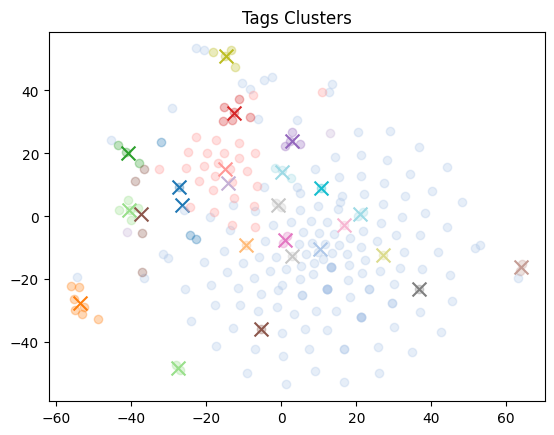

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# ใช้ t-SNE สำหรับการแสดงผล
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)
vis_dims2 = tsne.fit_transform(X)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

# สีสำหรับแต่ละกลุ่ม
unique_labels = set(labels)
colors = plt.cm.get_cmap('tab20', len(unique_labels))

for category, color in zip(unique_labels, colors.colors):
    xs = np.array(x)[result.Cluster == category]
    ys = np.array(y)[result.Cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)

plt.title("Tags Clusters")
plt.show()


In [ ]:
# from sklearn.manifold import TSNE
# import matplotlib
# import matplotlib.pyplot as plt

# tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)
# vis_dims2 = tsne.fit_transform(X)

# x = [x for x, y in vis_dims2]
# y = [y for x, y in vis_dims2]

# for category, color in enumerate(colors):
#     xs = np.array(x)[result.Cluster == category]
#     ys = np.array(y)[result.Cluster == category]
#     plt.scatter(xs, ys, color=color, alpha=0.3)

#     avg_x = xs.mean()
#     avg_y = ys.mean()

#     plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
# plt.title("Clusters identified visualized in language 2d using t-SNE")


In [ ]:
for i in range(n_clusters):
  print(f"Cluster {i}: {', '.join(map(str, result[result['Cluster'] == i]['Tag'].unique()))}")

Cluster 0: firebase, firebase-cloud-messaging, google-cloud-messaging
Cluster 1: android-wake-lock
Cluster 2: 2d-games, accelerometer, activity-recognition, alarm, alarmmanager, alerts, amazon-sns, animation, api, appstore-approval, auto-close, automation, backend, background, background-process, background-task, battery, battery-saver, batterylevel, batterymanager, benchmarking, blackberry, broadcastreceiver, browser, c#, caching, chat, client-server, cllocation, cllocationmanager, clregion, cocoa-touch, compact-framework, connection, cordova, cordova-plugins, core-motion, daemon, datetime, disconnect, display, eclipse, email, energy, events, exit, extjs, flutter, foreground, fusedlocationproviderapi, fusedlocationproviderclient, game-engine, garbage-collection, geofencing, geolocation, gps, handler, instruments, intercept, ios4, ios5, ios6, ios7, ios8, ipad-2, iphone, iphone-privateapi, java, keep-alive, keypress, kotlin, lifecycle, localization, locationlistener, locationmanager, lo

หลังใช้วิธีการให้ 2 คน weight

In [ ]:
!pip install python-docx pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 7.7 MB/s eta 0:00:00


In [ ]:
# from docx import Document
# import pandas as pd
# import re

# # อ่านไฟล์ .docx
# doc_path = "/content/tag_succeed.docx"  # แก้เป็น path ของไฟล์ที่ต้องใช้
# doc = Document(doc_path)

# # พาร์สข้อมูลจาก .docx
# clusters = {}
# not_in_clusters = []
# current_cluster = None

# for para in doc.paragraphs:
#     text = para.text.strip()

#     # เช็คว่าเป็นหัวข้อคลัสเตอร์หรือไม่ (เช่น "Cluster 0:")
#     cluster_match = re.match(r"Cluster (\d+):\s*(.*)", text)

#     if cluster_match:
#         current_cluster = int(cluster_match.group(1))
#         tags = cluster_match.group(2).strip().split(", ") if cluster_match.group(2) else []
#         clusters[current_cluster] = tags
#     elif text:  # ถ้าเป็นแท็กที่ไม่ได้อยู่ในคลัสเตอร์ ให้เพิ่มลงไปใน not_in_clusters
#         not_in_clusters.extend(text.split(", "))

# tag_to_cluster = {tag.lower().strip(): cluster for cluster, tags in clusters.items() for tag in tags}

# # ตรวจสอบ unique_tags_list และทำให้เป็น lowercase เช่นกัน
# unique_tags_list = [tag.lower().strip() for tag in unique_tags[0]]

# # สร้าง DataFrame
# result = pd.DataFrame({"Tag": unique_tags_list})
# result["Cluster"] = result["Tag"].map(tag_to_cluster)

# # แท็กที่ยังไม่มี Cluster (NaN) ให้เพิ่มเข้าไปในคลัสเตอร์ใหม่
# new_cluster_id = max(clusters.keys(), default=39) + 1
# for index, row in result.iterrows():
#     if pd.isna(row["Cluster"]):  # ถ้าเป็น NaN
#         result.at[index, "Cluster"] = new_cluster_id
#         new_cluster_id += 1

# # แสดงผล
# result

# # # สร้างแมปแท็ก → คลัสเตอร์
# # tag_to_cluster = {tag: cluster for cluster, tags in clusters.items() for tag in tags}

# # # จัดกลุ่มแท็กที่ไม่ได้อยู่ในคลัสเตอร์
# # new_cluster_id = max(clusters.keys(), default=39) + 1
# # for tag in not_in_clusters:
# #     tag_to_cluster[tag] = new_cluster_id
# #     new_cluster_id += 1

# # # โหลด unique_tags จากตัวแปรที่มีอยู่แล้ว
# # unique_tags_list = unique_tags[0]  # สมมติว่า unique_tags เป็น List

# # # สร้าง DataFrame
# # result = pd.DataFrame({"Tag": unique_tags_list})
# # result["Cluster"] = result["Tag"].map(tag_to_cluster)

# # # แสดงผล
# # print(result)


In [ ]:
# result['Cluster'].max()

In [ ]:
# from openai import OpenAI
# import os
# import pandas as pd

# # ตั้งค่า API Key (ใช้ตัวแปรลับในระบบ แทนที่ os.environ หรือใส่คีย์ตรงนี้)
# client = OpenAI(api_key="Insert OpenAI Key")

# # แปลง Cluster ให้เป็น int (ตัดทศนิยม)
# result["Cluster"] = result["Cluster"].astype(int)

# # เก็บชื่อคลัสเตอร์ที่ OpenAI สร้าง
# cluster_names = {}

# for cluster_id in sorted(result["Cluster"].unique()):  # วนลูปตามคลัสเตอร์ที่มีอยู่
#     cluster_tags = result[result["Cluster"] == cluster_id]["Tag"].tolist()

#     # ใช้จำนวน tags ทั้งหมดในคลัสเตอร์นั้นเป็นตัวอย่าง
#     rev_per_cluster = len(cluster_tags)

#     # เอา tag สูงสุด rev_per_cluster ตัวอย่างมาใช้
#     sample_tags = ", ".join(cluster_tags[:rev_per_cluster])

#     messages = [
#         {"role": "user", "content": f'Give a short category name for these tags:\n"{sample_tags}"'}
#     ]

#     response = client.chat.completions.create(
#         model="gpt-4",
#         messages=messages,
#         temperature=0,
#         max_tokens=10,
#         top_p=1,
#         frequency_penalty=0,
#         presence_penalty=0
#     )

#     cluster_name = response.choices[0].message.content.strip()
#     cluster_names[cluster_id] = cluster_name

#     print(f"Cluster {cluster_id}: {cluster_name}")

# # เพิ่มชื่อคลัสเตอร์ลงใน DataFrame
# result["Cluster_Name"] = result["Cluster"].map(cluster_names)

# # แสดงผลลัพธ์
# result

In [ ]:
# result['Cluster_Name'] = result['Cluster_Name'].str.replace('"', '')
# result.rename(columns={"Cluster_Name": "Tag Name"})

In [ ]:
# result.to_csv('Tags_cluster.csv')

In [ ]:
result = pd.read_csv('/content/Tags_cluster.csv', index_col = 0)
result

,Tag,Cluster,Cluster_Name
0,2d-games,2,Game Development and Design
1,accelerometer,40,"""Sensor Technology"""
2,activity-recognition,41,"""Technology & Software"""
3,alarm,29,"""Alarm and Alert Systems"""
4,alarmmanager,29,"""Alarm and Alert Systems"""
...,...,...,...
236,xamarin.forms,133,"""Mobile App Development"""
237,xamarin.ios,20,iOS Development
238,xcode,14,"""Apple Xcode Development"""
239,xcode-instruments,14,"""Apple Xcode Development"""


In [ ]:
result['Cluster_Name'] = result['Cluster_Name'].str.replace('"', '')
result.rename(columns={"Cluster_Name": "Tag_Name"},inplace= True)

In [ ]:
cluster_name = dict(zip(result['Cluster'], result['Tag_Name']))

def replace_tag_with_cluster_name(row, cluster_names, result):
    for tag_column in ['tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5']:
        tag = row[tag_column]
        if tag:
            cluster_id = result[result['Tag'] == tag]['Cluster'].values
            if cluster_id.size > 0:
                cluster_name = cluster_names.get(cluster_id[0], None)
                # Create a new column for each tag with cluster name
                row[f'{tag_column}_cluster_name'] = cluster_name
    return row

# Apply the function to replace tags with cluster names
cleaned_data = cleaned_data.apply(replace_tag_with_cluster_name, axis=1, cluster_names=cluster_name, result=result)

# Display the result
cleaned_data

,Cluster,Cluster_Name,accepted_answer,answer_body,answer_comment_count,answer_count,answer_create_date,answer_create_date_day,answer_create_date_month,answer_create_date_time,...,tag_2_cluster_name,tag_3,tag_3_cluster_name,tag_4,tag_4_cluster_name,tag_5,tag_5_cluster_name,tags,title,view_count
0,2,Location Services and GPS Impact on Mobile Bat...,NaN,<p>As far as I know you can't do that. Browser...,0,1,2015-04-24 14:53:47,24,4,14:53:47,...,Design Elements,refresh,Browser Actions,NaN,NaN,NaN,NaN,browser|background|refresh,Acquiring GPS data from mobile browser,77
1,0,Battery Usage and Optimization in iOS Applicat...,NaN,"<p>service - for background work, receiver for...",1,1,2013-08-28 03:07:58,28,8,03:07:58,...,Entertainment,android-intent,Android Development,android-fragments,Android Development,alarmmanager,Alarm and Alert Systems,android|performance|android-intent|android-fra...,"Activity, service or fragment?",126
2,0,Battery Usage and Optimization in iOS Applicat...,NaN,<p>As per the documentation: </p>\n\n<blockquo...,0,1,2015-06-29 18:23:08,29,6,18:23:08,...,Technology & Software,NaN,NaN,NaN,NaN,NaN,NaN,android|activity-recognition,ActivityRecognitionAPI keeps sending pending i...,104
3,0,Battery Usage and Optimization in iOS Applicat...,NaN,"<p>Try with only <strong>RTC</strong>, because...",0,1,2016-05-02 08:30:23,2,5,08:30:23,...,Android Service Management,alarmmanager,Alarm and Alert Systems,NaN,NaN,NaN,NaN,android|android-service|alarmmanager,AlarmManager RTC_WAKEUP drains battery,794
4,0,Battery Usage and Optimization in iOS Applicat...,NaN,"<p>Ok, turns out the example I was looking at ...",0,1,2015-03-13 07:02:58,13,3,07:02:58,...,Android Development,alarmmanager,Alarm and Alert Systems,android-notifications,Mobile Notifications,NaN,NaN,android|android-studio|alarmmanager|android-no...,AlarmManager with notification not firing,754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,2,Location Services and GPS Impact on Mobile Bat...,12782209.0,<p>You are right: if you run a service that ch...,1,2,2012-10-08 12:55:32,8,10,12:55:32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,smart phone bratinger app,70
936,2,Location Services and GPS Impact on Mobile Bat...,12782209.0,<p>You dont need to run background service to ...,0,2,2012-10-08 13:02:14,8,10,13:02:14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,smart phone bratinger app,70
937,2,Location Services and GPS Impact on Mobile Bat...,30590222.0,"<p>You need to set the desiredAccuracy, distan...",0,1,2015-06-02 07:43:39,2,6,07:43:39,...,Programming Languages,cllocationmanager,Location and Navigation Services,NaN,NaN,NaN,NaN,ios|objective-c|cllocationmanager,startMonitoringSignificantLocationChanges call...,344
938,2,Location Services and GPS Impact on Mobile Bat...,NaN,NaN,0,0,None,0,0,0,...,Programming Languages,location,Location and Navigation Services,NaN,NaN,NaN,NaN,ios|swift|location,"swift iOS , location manager startUpdatingLoca...",287


In [ ]:
cleaned_data['tag_2']

,tag_2
0,background
1,performance
2,activity-recognition
3,android-service
4,android-studio
...,...
935,NaN
936,NaN
937,objective-c
938,swift


#How Long to get accepted answer (02/20/2024) [ใช้ไม่ได้เพราะข้อมูลซ้อนทับกันระหว่าง Accepted Answer Date กับ edit date]

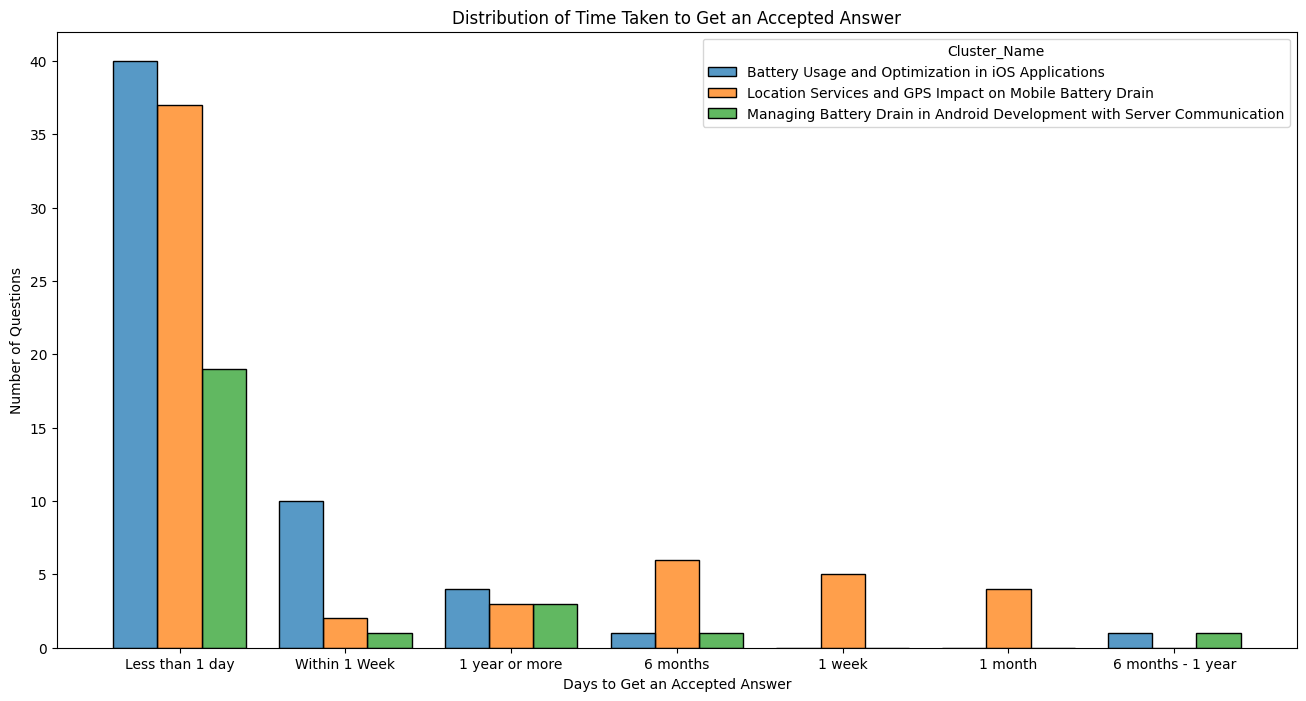

In [ ]:
plt.figure(figsize=(16, 8))

# Create the bar plot
# sns.histplot(data=cleaned_data, x='date_diff_range', hue='Cluster', multiple="dodge", binwidth=0.5, kde=True, palette="tab10")
sns.histplot(data=accepted_answer, x='date_diff_range', hue='Cluster_Name', multiple="dodge", shrink=.8, palette="tab10")

plt.xlabel("Days to Get an Accepted Answer")
plt.ylabel("Number of Questions")
plt.title("Distribution of Time Taken to Get an Accepted Answer")

# Show plot
plt.show()

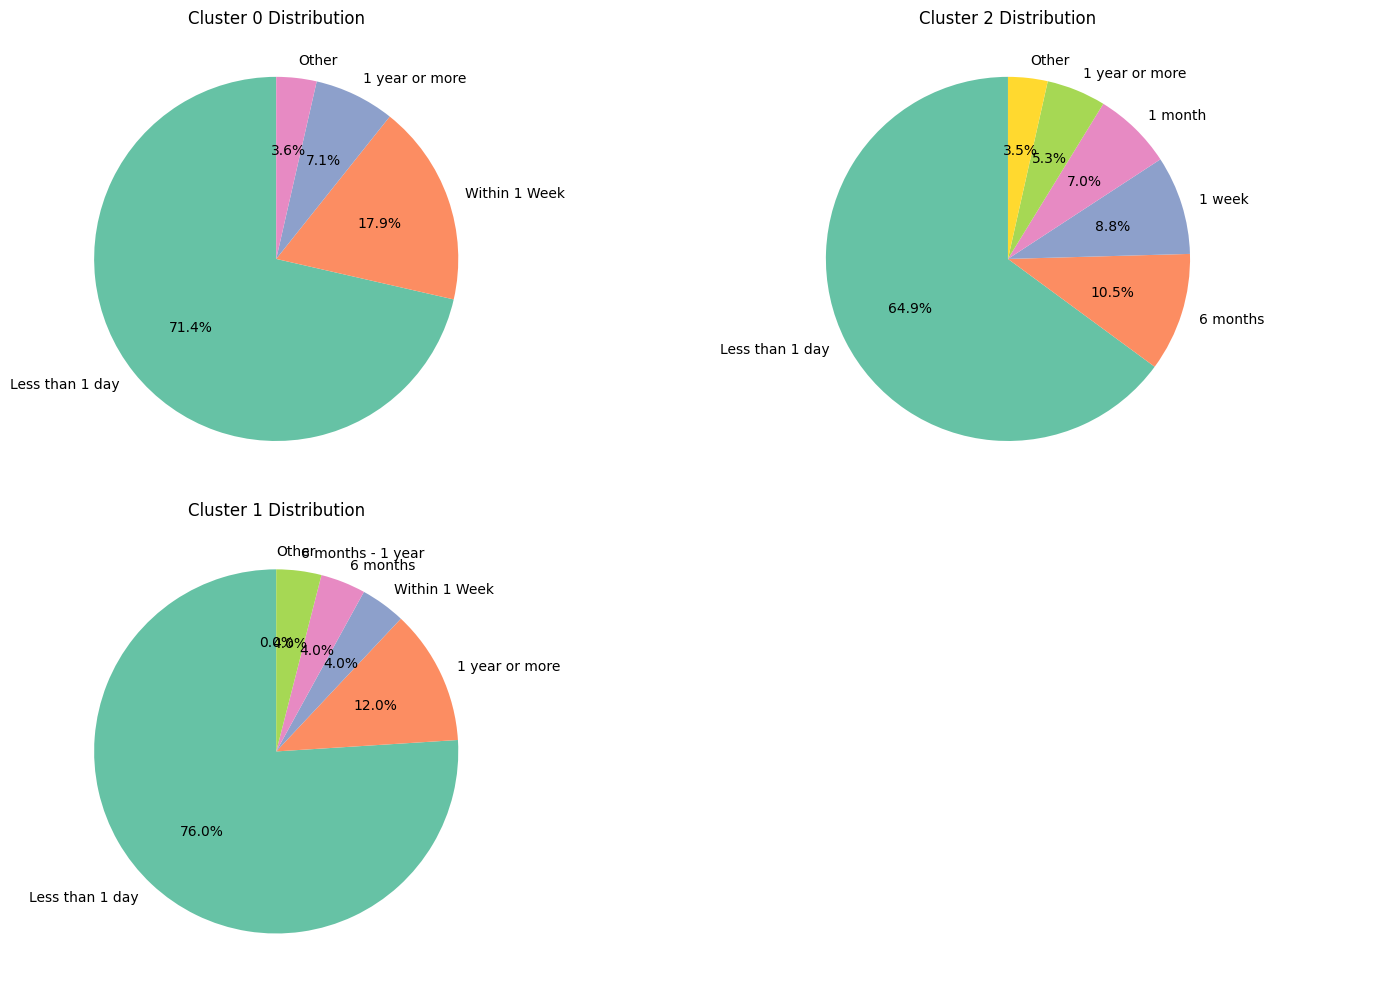

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

clusters = accepted_answer['Cluster'].unique()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, cluster in enumerate(clusters):
    cluster_data = accepted_answer[accepted_answer['Cluster'] == cluster]
    date_diff_counts = cluster_data['date_diff_range'].value_counts()

    total_count = len(cluster_data)
    percentage_counts = (date_diff_counts / total_count) * 100

    # axes[i].pie(
    #     date_diff_counts,
    #     labels=date_diff_counts.index,
    #     autopct="%1.1f%%",
    #     startangle=90,
    #     colors=sns.color_palette("Set2", len(date_diff_counts))
    # )

    date_diff_counts_adjusted = date_diff_counts[percentage_counts >= 4]
    date_diff_counts_adjusted['Other'] = date_diff_counts[percentage_counts < 4].sum()

    axes[i].pie(
        date_diff_counts_adjusted,
        labels=date_diff_counts_adjusted.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=sns.color_palette("Set2", len(date_diff_counts_adjusted))
    )
    axes[i].set_title(f"Cluster {cluster} Distribution")

axes[3].axis('off')
plt.tight_layout()
plt.show()

#เทียบจำนวน Accepted Answer กับ All Posts (รวมข้างล่าง)


In [ ]:
list_posts = cleaned_data.groupby('Cluster')['title'].nunique().reset_index()
list_posts.set_index('Cluster', inplace=True)
# list_posts.drop(columns=['Cluster'], inplace=True)
list_posts_accept = accepted_answer.groupby('Cluster')['title'].nunique().reset_index()
list_posts['accepted_posts'] = list_posts_accept['title']
list_posts.rename(columns = {'title':'all_posts',}, inplace = True)
list_posts.loc['Total'] = list_posts.sum()
list_posts['percent'] = (list_posts['accepted_posts']/list_posts['all_posts'])*100
list_posts

,all_posts,accepted_posts,percent
Cluster,,,
0,159,56,35.220126
1,53,25,47.169811
2,142,57,40.140845
Total,354,138,38.983051


In [ ]:
# list_posts_plot = list_posts.iloc[0:3]
# list_posts_plot

In [ ]:
# plt.figure(figsize=(10, 6))

# ax = sns.barplot(data=list_posts_plot, x='Cluster', y='all_posts', color='lightskyblue', label='All Posts')
# az = sns.barplot(data=list_posts_plot, x='Cluster', y='accepted_posts', color='royalblue', label='Accepted Posts')

# plt.xlabel("Cluster")
# plt.ylabel("Number of Posts")
# plt.title("Number of Posts by Cluster")
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# ax.bar_label(ax.containers[0], fontsize=10)
# ax.bar_label(ax.containers[1], fontsize=10)

# az.bar_label(az.containers[0], fontsize=10)
# az.bar_label(az.containers[1], fontsize=10)


# plt.show()

#Average Answer By Topic (ไม่ใช้แล้ว)

In [ ]:
# ans_clus0 = cleaned_data[cleaned_data['Cluster'] == 0]
# ans_clus1 = cleaned_data[cleaned_data['Cluster'] == 1]
# ans_clus2 = cleaned_data[cleaned_data['Cluster'] == 2]

In [ ]:
# ans_clus0["creation_date"] = pd.to_datetime(ans_clus0["creation_date"])
# ans_clus1["creation_date"] = pd.to_datetime(ans_clus1["creation_date"])
# ans_clus2["creation_date"] = pd.to_datetime(ans_clus2["creation_date"])

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import ipywidgets as widgets
# from IPython.display import display

# def prepare_data(ans_clus, cluster_name):
#     post_counts = ans_clus["creation_date"].dt.date.value_counts().sort_index()
#     df_post = post_counts.reset_index()
#     df_post.columns = ["Date", "Count"]
#     df_post["Date"] = pd.to_datetime(df_post["Date"])
#     df_post["Year"] = df_post["Date"].dt.year
#     df_post["Month"] = df_post["Date"].dt.month
#     df_post["Cluster"] = cluster_name
#     return df_post

# df_post_0 = prepare_data(ans_clus0, "Cluster 0")
# df_post_1 = prepare_data(ans_clus1, "Cluster 1")
# df_post_2 = prepare_data(ans_clus2, "Cluster 2")

# df_all = pd.concat([df_post_0, df_post_1, df_post_2])

# years = sorted(df_all["Year"].unique())
# months = sorted(df_all["Month"].unique())

# year_selector = widgets.Dropdown(
#     options=years,
#     value=years[-1],
#     description="Year:",
# )

# month_selector = widgets.Dropdown(
#     options=months,
#     value=months[-1],
#     description="Month:",
# )

# cluster_selector = widgets.SelectMultiple(
#     options=["Cluster 0", "Cluster 1", "Cluster 2"],
#     value=["Cluster 0", "Cluster 1", "Cluster 2"],
#     description="Clusters",
# )

# def plot_selected(year, month, selected_clusters):
#     plt.figure(figsize=(12, 6))

#     filtered_df = df_all[(df_all["Year"] == year) &
#                          (df_all["Month"] == month) &
#                          (df_all["Cluster"].isin(selected_clusters))]

#     sns.lineplot(x="Date", y="Count", hue="Cluster", data=filtered_df)

#     plt.xlabel("Date")
#     plt.ylabel("Number of Posts")
#     plt.title(f"Post Count by Creation Date ({year}-{month}) for {', '.join(selected_clusters)}")
#     plt.xticks(rotation=45)
#     plt.legend(title="Cluster")
#     plt.show()

# widgets.interactive(plot_selected,
#                     year=year_selector,
#                     month=month_selector,
#                     selected_clusters=cluster_selector)

# #ทำงานได้ไม่ดีย์

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import ipywidgets as widgets
# from IPython.display import display

# # ฟังก์ชันสร้าง DataFrame สำหรับแต่ละคลัสเตอร์
# def prepare_data(ans_clus, cluster_name):
#     post_counts = ans_clus["creation_date"].dt.date.value_counts().sort_index()
#     df_post = post_counts.reset_index()
#     df_post.columns = ["Date", "Count"]
#     df_post["Date"] = pd.to_datetime(df_post["Date"])  # แปลงให้ Date เป็น datetime
#     df_post["Year"] = df_post["Date"].dt.year
#     df_post["Month"] = df_post["Date"].dt.month
#     df_post["Cluster"] = cluster_name
#     return df_post

# df_post_0 = prepare_data(ans_clus0, "Cluster 0")
# df_post_1 = prepare_data(ans_clus1, "Cluster 1")
# df_post_2 = prepare_data(ans_clus2, "Cluster 2")

# df_all = pd.concat([df_post_0, df_post_1, df_post_2])

# # ดึงปีที่มีในข้อมูล
# years = sorted(df_all["Year"].unique())

# # Widget เลือกปี
# year_selector = widgets.Dropdown(
#     options=years,
#     value=years[-1],  # ค่าเริ่มต้นเป็นปีล่าสุด
#     description="Year:",
# )

# # Widget เลือกคลัสเตอร์
# cluster_selector = widgets.SelectMultiple(
#     options=["Cluster 0", "Cluster 1", "Cluster 2"],
#     value=["Cluster 0", "Cluster 1", "Cluster 2"],
#     description="Clusters",
# )

# # ฟังก์ชัน plot กราฟตามปีและคลัสเตอร์ที่เลือก
# def plot_selected(year, selected_clusters):
#     plt.figure(figsize=(12, 6))

#     # กรองข้อมูลตามปีและคลัสเตอร์ที่เลือก
#     filtered_df = df_all[(df_all["Year"] == year) & (df_all["Cluster"].isin(selected_clusters))]

#     # กำหนดช่วงของวันที่ที่จะแสดงบนแกน X (ครบทุกเดือน)
#     all_months = pd.date_range(start=f"{year}-01-01", end=f"{year}-12-31", freq='MS')  # เริ่มต้นจากเดือนมกราคมถึงธันวาคม
#     all_months_str = all_months.strftime('%Y-%m')  # เปลี่ยนเป็นรูปแบบปี-เดือน

#     # แสดงกราฟ
#     sns.lineplot(x="Date", y="Count", hue="Cluster", data=filtered_df)

#     # ปรับแต่งแกน X ให้แสดงทุกเดือน
#     plt.xticks(ticks=all_months, labels=all_months_str, rotation=45)

#     plt.xlabel("Month")
#     plt.ylabel("Number of Posts")
#     plt.title(f"Post Count by Creation Date ({year}) for {', '.join(selected_clusters)}")
#     plt.legend(title="Cluster")
#     plt.show()

# # ทำให้ Widget อินเทอร์แอคทีฟ
# widgets.interactive(plot_selected, year=year_selector, selected_clusters=cluster_selector)


In [ ]:
# post_counts_0 = ans_clus0["creation_date"].dt.date.value_counts().sort_index()
# df_post_0 = post_counts_0.reset_index()
# df_post_0.columns = ["Date", "Count"]
# post_counts_1 = ans_clus1["creation_date"].dt.date.value_counts().sort_index()
# df_post_1 = post_counts_1.reset_index()
# df_post_1.columns = ["Date", "Count"]
# post_counts_2 = ans_clus2["creation_date"].dt.date.value_counts().sort_index()
# df_post_2 = post_counts_2.reset_index()
# df_post_2.columns = ["Date", "Count"]

# plt.figure(figsize=(10, 5))
# sns.lineplot(x="Date", y="Count", data=df_post_0)
# sns.lineplot(x="Date", y="Count", data=df_post_1)
# sns.lineplot(x="Date", y="Count", data=df_post_2)

# plt.xlabel("Number of Posts per Day")
# plt.ylabel("Density")
# plt.title("KDE Plot of Post Count by Creation Date")
# plt.show()

#How long to get first answer? (02/20/2025)

In [ ]:
cleaned_data['answer_create_date']

,answer_create_date
0,2015-04-24 14:53:47
1,2013-08-28 03:07:58
2,2015-06-29 18:23:08
3,2016-05-02 08:30:23
4,2015-03-13 07:02:58
...,...
935,2012-10-08 12:55:32
936,2012-10-08 13:02:14
937,2015-06-02 07:43:39
938,None


In [ ]:
df_first_answer = cleaned_data.drop_duplicates(subset=['title'], keep='first')
df_first_answer = df_first_answer[df_first_answer['answer_count'] >= 1]
df_first_answer

,Cluster,Cluster_Name,accepted_answer,answer_body,answer_comment_count,answer_count,answer_create_date,answer_create_date_day,answer_create_date_month,answer_create_date_time,...,tag_2_cluster_name,tag_3,tag_3_cluster_name,tag_4,tag_4_cluster_name,tag_5,tag_5_cluster_name,tags,title,view_count
0,2,Location Services and GPS Impact on Mobile Bat...,NaN,<p>As far as I know you can't do that. Browser...,0,1,2015-04-24 14:53:47,24,4,14:53:47,...,Design Elements,refresh,Browser Actions,NaN,NaN,NaN,NaN,browser|background|refresh,Acquiring GPS data from mobile browser,77
1,0,Battery Usage and Optimization in iOS Applicat...,NaN,"<p>service - for background work, receiver for...",1,1,2013-08-28 03:07:58,28,8,03:07:58,...,Entertainment,android-intent,Android Development,android-fragments,Android Development,alarmmanager,Alarm and Alert Systems,android|performance|android-intent|android-fra...,"Activity, service or fragment?",126
2,0,Battery Usage and Optimization in iOS Applicat...,NaN,<p>As per the documentation: </p>\n\n<blockquo...,0,1,2015-06-29 18:23:08,29,6,18:23:08,...,Technology & Software,NaN,NaN,NaN,NaN,NaN,NaN,android|activity-recognition,ActivityRecognitionAPI keeps sending pending i...,104
3,0,Battery Usage and Optimization in iOS Applicat...,NaN,"<p>Try with only <strong>RTC</strong>, because...",0,1,2016-05-02 08:30:23,2,5,08:30:23,...,Android Service Management,alarmmanager,Alarm and Alert Systems,NaN,NaN,NaN,NaN,android|android-service|alarmmanager,AlarmManager RTC_WAKEUP drains battery,794
4,0,Battery Usage and Optimization in iOS Applicat...,NaN,"<p>Ok, turns out the example I was looking at ...",0,1,2015-03-13 07:02:58,13,3,07:02:58,...,Android Development,alarmmanager,Alarm and Alert Systems,android-notifications,Mobile Notifications,NaN,NaN,android|android-studio|alarmmanager|android-no...,AlarmManager with notification not firing,754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2,Location Services and GPS Impact on Mobile Bat...,7717299.0,<p>If you dig into the innards of the <a href=...,1,2,2011-10-10 18:55:59,10,10,18:55:59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,requestLocationUpdates parameters having no ef...,2636
932,2,Location Services and GPS Impact on Mobile Bat...,NaN,"<p>The answer to <a href=""https://stackoverflo...",0,1,2011-02-07 13:48:22,7,2,13:48:22,...,Programming Concepts,background,Design Elements,location,Location and Navigation Services,nstimer,Timing Tools,iphone|multithreading|background|location|nstimer,running an NSTimer in the background of a mult...,2905
933,2,Location Services and GPS Impact on Mobile Bat...,11497565.0,<p>You can user <code>AlarmManager</code> Clas...,2,1,2012-07-16 02:44:46,16,7,02:44:46,...,Android Service Management,NaN,NaN,NaN,NaN,NaN,NaN,android|service,service that will run and stop automatically i...,1243
935,2,Location Services and GPS Impact on Mobile Bat...,12782209.0,<p>You are right: if you run a service that ch...,1,2,2012-10-08 12:55:32,8,10,12:55:32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,smart phone bratinger app,70


In [ ]:
df_first_answer['creation_date'] = pd.to_datetime(df_first_answer['creation_date'], errors='coerce')
df_first_answer['answer_create_date'] = pd.to_datetime(df_first_answer['answer_create_date'], errors='coerce')
df_first_answer['date_ans_diff'] = df_first_answer['answer_create_date'] - df_first_answer['creation_date']
df_first_answer

,Cluster,Cluster_Name,accepted_answer,answer_body,answer_comment_count,answer_count,answer_create_date,answer_create_date_day,answer_create_date_month,answer_create_date_time,...,tag_3,tag_3_cluster_name,tag_4,tag_4_cluster_name,tag_5,tag_5_cluster_name,tags,title,view_count,date_ans_diff
0,2,Location Services and GPS Impact on Mobile Bat...,NaN,<p>As far as I know you can't do that. Browser...,0,1,2015-04-24 14:53:47,24,4,14:53:47,...,refresh,Browser Actions,NaN,NaN,NaN,NaN,browser|background|refresh,Acquiring GPS data from mobile browser,77,2 days 05:01:54
1,0,Battery Usage and Optimization in iOS Applicat...,NaN,"<p>service - for background work, receiver for...",1,1,2013-08-28 03:07:58,28,8,03:07:58,...,android-intent,Android Development,android-fragments,Android Development,alarmmanager,Alarm and Alert Systems,android|performance|android-intent|android-fra...,"Activity, service or fragment?",126,0 days 01:35:31
2,0,Battery Usage and Optimization in iOS Applicat...,NaN,<p>As per the documentation: </p>\n\n<blockquo...,0,1,2015-06-29 18:23:08,29,6,18:23:08,...,NaN,NaN,NaN,NaN,NaN,NaN,android|activity-recognition,ActivityRecognitionAPI keeps sending pending i...,104,27 days 18:12:26
3,0,Battery Usage and Optimization in iOS Applicat...,NaN,"<p>Try with only <strong>RTC</strong>, because...",0,1,2016-05-02 08:30:23,2,5,08:30:23,...,alarmmanager,Alarm and Alert Systems,NaN,NaN,NaN,NaN,android|android-service|alarmmanager,AlarmManager RTC_WAKEUP drains battery,794,0 days 00:58:35
4,0,Battery Usage and Optimization in iOS Applicat...,NaN,"<p>Ok, turns out the example I was looking at ...",0,1,2015-03-13 07:02:58,13,3,07:02:58,...,alarmmanager,Alarm and Alert Systems,android-notifications,Mobile Notifications,NaN,NaN,android|android-studio|alarmmanager|android-no...,AlarmManager with notification not firing,754,0 days 07:26:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2,Location Services and GPS Impact on Mobile Bat...,7717299.0,<p>If you dig into the innards of the <a href=...,1,2,2011-10-10 18:55:59,10,10,18:55:59,...,NaN,NaN,NaN,NaN,NaN,NaN,android,requestLocationUpdates parameters having no ef...,2636,7 days 03:09:11
932,2,Location Services and GPS Impact on Mobile Bat...,NaN,"<p>The answer to <a href=""https://stackoverflo...",0,1,2011-02-07 13:48:22,7,2,13:48:22,...,background,Design Elements,location,Location and Navigation Services,nstimer,Timing Tools,iphone|multithreading|background|location|nstimer,running an NSTimer in the background of a mult...,2905,186 days 15:45:07
933,2,Location Services and GPS Impact on Mobile Bat...,11497565.0,<p>You can user <code>AlarmManager</code> Clas...,2,1,2012-07-16 02:44:46,16,7,02:44:46,...,NaN,NaN,NaN,NaN,NaN,NaN,android|service,service that will run and stop automatically i...,1243,0 days 00:06:40
935,2,Location Services and GPS Impact on Mobile Bat...,12782209.0,<p>You are right: if you run a service that ch...,1,2,2012-10-08 12:55:32,8,10,12:55:32,...,NaN,NaN,NaN,NaN,NaN,NaN,android,smart phone bratinger app,70,0 days 00:12:53


In [ ]:
df_first_answer['date_ans_diff_range'] = df_first_answer['date_ans_diff'].apply(categorize_duration)

In [ ]:
df_first_answer

,Cluster,Cluster_Name,accepted_answer,answer_body,answer_comment_count,answer_count,answer_create_date,answer_create_date_day,answer_create_date_month,answer_create_date_time,...,tag_3_cluster_name,tag_4,tag_4_cluster_name,tag_5,tag_5_cluster_name,tags,title,view_count,date_ans_diff,date_ans_diff_range
0,2,Location Services and GPS Impact on Mobile Bat...,NaN,<p>As far as I know you can't do that. Browser...,0,1,2015-04-24 14:53:47,24,4,14:53:47,...,Browser Actions,NaN,NaN,NaN,NaN,browser|background|refresh,Acquiring GPS data from mobile browser,77,2 days 05:01:54,Within 1 Week
1,0,Battery Usage and Optimization in iOS Applicat...,NaN,"<p>service - for background work, receiver for...",1,1,2013-08-28 03:07:58,28,8,03:07:58,...,Android Development,android-fragments,Android Development,alarmmanager,Alarm and Alert Systems,android|performance|android-intent|android-fra...,"Activity, service or fragment?",126,0 days 01:35:31,Less than 1 day
2,0,Battery Usage and Optimization in iOS Applicat...,NaN,<p>As per the documentation: </p>\n\n<blockquo...,0,1,2015-06-29 18:23:08,29,6,18:23:08,...,NaN,NaN,NaN,NaN,NaN,android|activity-recognition,ActivityRecognitionAPI keeps sending pending i...,104,27 days 18:12:26,1 month
3,0,Battery Usage and Optimization in iOS Applicat...,NaN,"<p>Try with only <strong>RTC</strong>, because...",0,1,2016-05-02 08:30:23,2,5,08:30:23,...,Alarm and Alert Systems,NaN,NaN,NaN,NaN,android|android-service|alarmmanager,AlarmManager RTC_WAKEUP drains battery,794,0 days 00:58:35,Less than 1 day
4,0,Battery Usage and Optimization in iOS Applicat...,NaN,"<p>Ok, turns out the example I was looking at ...",0,1,2015-03-13 07:02:58,13,3,07:02:58,...,Alarm and Alert Systems,android-notifications,Mobile Notifications,NaN,NaN,android|android-studio|alarmmanager|android-no...,AlarmManager with notification not firing,754,0 days 07:26:21,Less than 1 day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2,Location Services and GPS Impact on Mobile Bat...,7717299.0,<p>If you dig into the innards of the <a href=...,1,2,2011-10-10 18:55:59,10,10,18:55:59,...,NaN,NaN,NaN,NaN,NaN,android,requestLocationUpdates parameters having no ef...,2636,7 days 03:09:11,1 week
932,2,Location Services and GPS Impact on Mobile Bat...,NaN,"<p>The answer to <a href=""https://stackoverflo...",0,1,2011-02-07 13:48:22,7,2,13:48:22,...,Design Elements,location,Location and Navigation Services,nstimer,Timing Tools,iphone|multithreading|background|location|nstimer,running an NSTimer in the background of a mult...,2905,186 days 15:45:07,6 months - 1 year
933,2,Location Services and GPS Impact on Mobile Bat...,11497565.0,<p>You can user <code>AlarmManager</code> Clas...,2,1,2012-07-16 02:44:46,16,7,02:44:46,...,NaN,NaN,NaN,NaN,NaN,android|service,service that will run and stop automatically i...,1243,0 days 00:06:40,Less than 1 day
935,2,Location Services and GPS Impact on Mobile Bat...,12782209.0,<p>You are right: if you run a service that ch...,1,2,2012-10-08 12:55:32,8,10,12:55:32,...,NaN,NaN,NaN,NaN,NaN,android,smart phone bratinger app,70,0 days 00:12:53,Less than 1 day


In [ ]:
sorted_categories = df_first_answer['date_ans_diff_range'].value_counts().sort_values(ascending=False).index
df_first_answer['date_ans_diff_range'] = pd.Categorical(df_first_answer['date_ans_diff_range'], categories=sorted_categories, ordered=True)

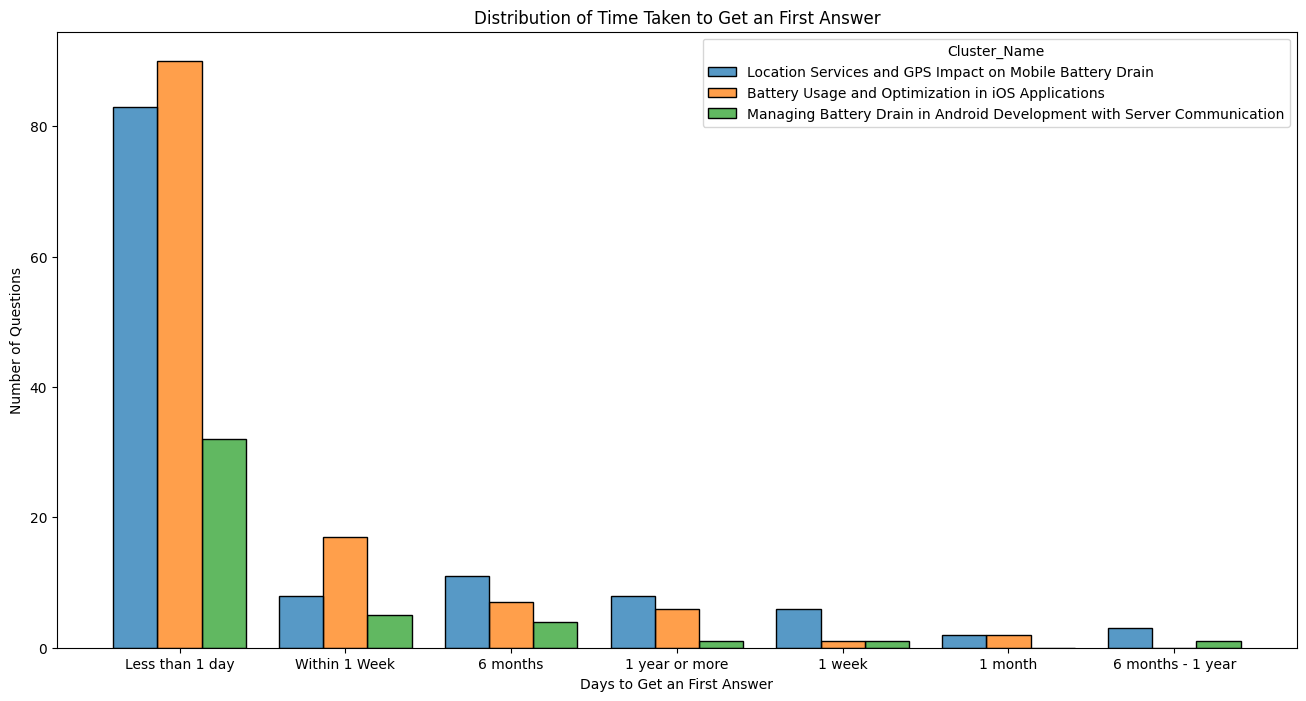

In [ ]:
plt.figure(figsize=(16, 8))

sns.histplot(data=df_first_answer, x='date_ans_diff_range', hue='Cluster_Name', multiple="dodge", shrink=.8, palette="tab10")

plt.xlabel("Days to Get an First Answer")
plt.ylabel("Number of Questions")
plt.title("Distribution of Time Taken to Get an First Answer")

# Show plot
plt.show()

In [ ]:
df_first_answer['date_ans_diff_range'].dtypes

CategoricalDtype(categories=['Less than 1 day', 'Within 1 Week', '6 months',
                  '1 year or more', '1 week', '1 month', '6 months - 1 year'],
, ordered=True, categories_dtype=object)

In [ ]:
df_first_answer_new = df_first_answer.groupby(['Cluster', 'date_ans_diff_range'])['answer_count'].sum()
# df_first_answer_new.reset_index()
# total_answer_counts = df_first_answer.groupby("Cluster")["answer_count"].sum().reset_index()
# total_answer_counts.rename(columns={"answer_count": "Total Answer Count"}, inplace=True)

# df_first_answer_new = df_first_answer_new.merge(total_answer_counts, on="Cluster", how="left")

df_first_answer_new

Cluster  date_ans_diff_range
0        Less than 1 day        157
         Within 1 Week           25
         6 months                 9
         1 year or more           8
         1 week                   1
         1 month                  2
         6 months - 1 year        0
1        Less than 1 day         48
         Within 1 Week            7
         6 months                 4
         1 year or more          20
         1 week                   1
         1 month                  0
         6 months - 1 year        1
2        Less than 1 day        121
         Within 1 Week           18
         6 months                16
         1 year or more          12
         1 week                  11
         1 month                  7
         6 months - 1 year        4
Name: answer_count, dtype: int64

In [ ]:
import pandas as pd

df_first_answer_new = df_first_answer.groupby(['Cluster', 'date_ans_diff_range'])['answer_count'].sum().reset_index()
total_answer_counts = df_first_answer.groupby("Cluster")["answer_count"].sum().reset_index()
total_answer_counts.rename(columns={"answer_count": "Total_Answer_Count"}, inplace=True)
df_first_answer_new = df_first_answer_new.merge(total_answer_counts, on="Cluster", how="left")
df_first_answer_new

,Cluster,date_ans_diff_range,answer_count,Total_Answer_Count
0,0,Less than 1 day,157,202
1,0,Within 1 Week,25,202
2,0,6 months,9,202
3,0,1 year or more,8,202
4,0,1 week,1,202
5,0,1 month,2,202
6,0,6 months - 1 year,0,202
7,1,Less than 1 day,48,81
8,1,Within 1 Week,7,81
9,1,6 months,4,81


In [ ]:
df_first_answer_new['percent_first_answer_date'] = (df_first_answer_new['answer_count']/df_first_answer_new['Total_Answer_Count'])*100
df_first_answer_new.set_index(['Cluster','date_ans_diff_range'], inplace=True)
df_first_answer_new

answer_count  Total_Answer_Count  \
Cluster date_ans_diff_range                                     
0       Less than 1 day               157                 202   
        Within 1 Week                  25                 202   
        6 months                        9                 202   
        1 year or more                  8                 202   
        1 week                          1                 202   
        1 month                         2                 202   
        6 months - 1 year               0                 202   
1       Less than 1 day                48                  81   
        Within 1 Week                   7                  81   
        6 months                        4                  81   
        1 year or more                 20                  81   
        1 week                          1                  81   
        1 month                         0                  81   
        6 months - 1 year               1                  81   
2       Less than 1 day               121                 189   
        Within 1 Week                  18                 189   
        6 months                       16                 189   
        1 year or more                 12                 189   
        1 week                         11                 189   
        1 month                         7                 189   
        6 months - 1 year               4                 189   

                             percent_first_answer_date  
Cluster date_ans_diff_range                             
0       Less than 1 day                      77.722772  
        Within 1 Week                        12.376238  
        6 months                              4.455446  
        1 year or more                        3.960396  
        1 week                                0.495050  
        1 month                               0.990099  
        6 months - 1 year                     0.000000  
1       Less than 1 day                      59.259259  
        Within 1 Week                         8.641975  
        6 months                              4.938272  
        1 year or more                       24.691358  
        1 week                                1.234568  
        1 month                               0.000000  
        6 months - 1 year                     1.234568  
2       Less than 1 day                      64.021164  
        Within 1 Week                         9.523810  
        6 months                              8.465608  
        1 year or more                        6.349206  
        1 week                                5.820106  
        1 month                               3.703704  
        6 months - 1 year                     2.116402

#Average Answer By Cluster (02/20/2025)

In [ ]:
df_answer = cleaned_data.drop_duplicates(subset=['title'], keep='first')
df_answer = df_answer[['title','answer_count','Cluster','Cluster_Name']]
df_answer

,title,answer_count,Cluster,Cluster_Name
0,Acquiring GPS data from mobile browser,1,2,Location Services and GPS Impact on Mobile Bat...
1,"Activity, service or fragment?",1,0,Battery Usage and Optimization in iOS Applicat...
2,ActivityRecognitionAPI keeps sending pending i...,1,0,Battery Usage and Optimization in iOS Applicat...
3,AlarmManager RTC_WAKEUP drains battery,1,0,Battery Usage and Optimization in iOS Applicat...
4,AlarmManager with notification not firing,1,0,Battery Usage and Optimization in iOS Applicat...
...,...,...,...,...
933,service that will run and stop automatically i...,1,2,Location Services and GPS Impact on Mobile Bat...
935,smart phone bratinger app,2,2,Location Services and GPS Impact on Mobile Bat...
937,startMonitoringSignificantLocationChanges call...,1,2,Location Services and GPS Impact on Mobile Bat...
938,"swift iOS , location manager startUpdatingLoca...",0,2,Location Services and GPS Impact on Mobile Bat...


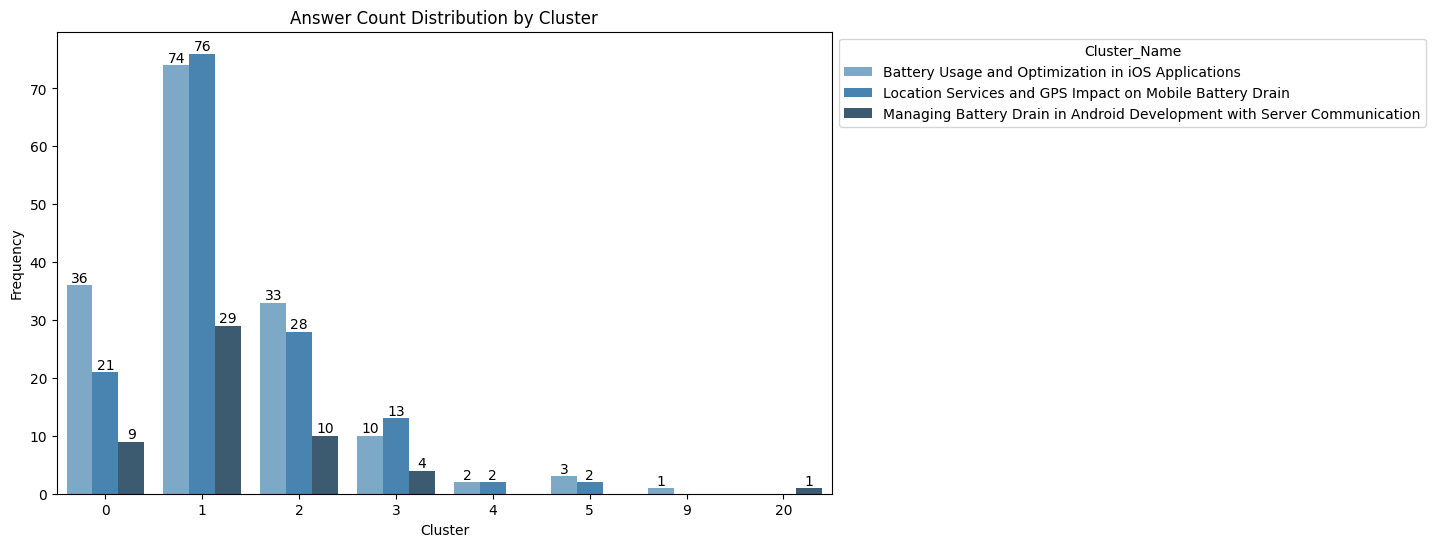

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

answer_count_unique = df_answer.groupby(['Cluster_Name', 'answer_count']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='answer_count', y='count', hue='Cluster_Name', data=answer_count_unique, palette='Blues_d')

plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Answer Count Distribution by Cluster')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)

plt.show()


In [ ]:
answer_count_unique

,Cluster_Name,answer_count,count
0,Battery Usage and Optimization in iOS Applicat...,0,36
1,Battery Usage and Optimization in iOS Applicat...,1,74
2,Battery Usage and Optimization in iOS Applicat...,2,33
3,Battery Usage and Optimization in iOS Applicat...,3,10
4,Battery Usage and Optimization in iOS Applicat...,4,2
5,Battery Usage and Optimization in iOS Applicat...,5,3
6,Battery Usage and Optimization in iOS Applicat...,9,1
7,Location Services and GPS Impact on Mobile Bat...,0,21
8,Location Services and GPS Impact on Mobile Bat...,1,76
9,Location Services and GPS Impact on Mobile Bat...,2,28


In [ ]:
for i in range(3):
  print(f"Cluster {i}: {', '.join(map(str, df_answer[df_answer['Cluster'] == i]['answer_count'].unique()))}")

Cluster 0: 1, 0, 3, 2, 5, 9, 4
Cluster 1: 1, 2, 3, 0, 20
Cluster 2: 1, 0, 2, 3, 5, 4


In [ ]:
mean_average = df_answer.groupby('Cluster_Name')['answer_count'].mean().reset_index()
mean_average['index'] = mean_average.index
mean_average

,Cluster_Name,answer_count,index
0,Battery Usage and Optimization in iOS Applicat...,1.270440,0
1,Location Services and GPS Impact on Mobile Bat...,1.330986,1
2,Managing Battery Drain in Android Development ...,1.528302,2


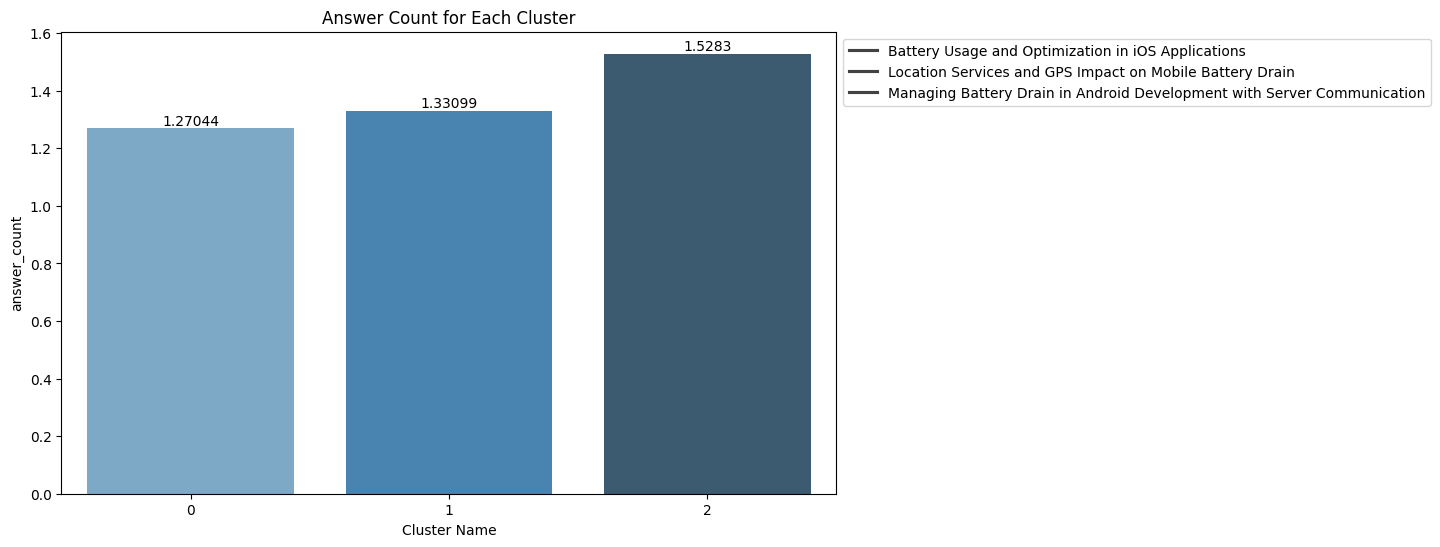

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='index', y='answer_count', data=mean_average, palette='Blues_d')

plt.xlabel('Cluster Name')
plt.title('Answer Count for Each Cluster')
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)

plt.legend(mean_average['Cluster_Name'], loc='upper left', bbox_to_anchor=(1, 1))

with comment

In [ ]:
df_answer_comment = cleaned_data.drop_duplicates(subset=['answer_body'], keep='first')
df_answer_comment = df_answer_comment[['title', 'answer_count', 'comment_count', 'answer_body', 'answer_comment_count', 'Cluster', 'Cluster_Name']]
df_answer_comment

,title,answer_count,comment_count,answer_body,answer_comment_count,Cluster,Cluster_Name
0,Acquiring GPS data from mobile browser,1,4,<p>As far as I know you can't do that. Browser...,0,2,Location Services and GPS Impact on Mobile Bat...
1,"Activity, service or fragment?",1,0,"<p>service - for background work, receiver for...",1,0,Battery Usage and Optimization in iOS Applicat...
2,ActivityRecognitionAPI keeps sending pending i...,1,0,<p>As per the documentation: </p>\n\n<blockquo...,0,0,Battery Usage and Optimization in iOS Applicat...
3,AlarmManager RTC_WAKEUP drains battery,1,1,"<p>Try with only <strong>RTC</strong>, because...",0,0,Battery Usage and Optimization in iOS Applicat...
4,AlarmManager with notification not firing,1,2,"<p>Ok, turns out the example I was looking at ...",0,0,Battery Usage and Optimization in iOS Applicat...
...,...,...,...,...,...,...,...
932,running an NSTimer in the background of a mult...,1,0,"<p>The answer to <a href=""https://stackoverflo...",0,2,Location Services and GPS Impact on Mobile Bat...
933,service that will run and stop automatically i...,1,0,<p>You can user <code>AlarmManager</code> Clas...,2,2,Location Services and GPS Impact on Mobile Bat...
935,smart phone bratinger app,2,1,<p>You are right: if you run a service that ch...,1,2,Location Services and GPS Impact on Mobile Bat...
936,smart phone bratinger app,2,1,<p>You dont need to run background service to ...,0,2,Location Services and GPS Impact on Mobile Bat...


In [ ]:
result = df_answer_comment.groupby('title').agg({
    'answer_count': 'first',
    'comment_count': 'first',
    'answer_comment_count': 'sum',
    'Cluster': 'first',
    'Cluster_Name': 'first'
}).reset_index()

In [ ]:
result = result.assign(all_comment_count = lambda x: (x['comment_count'] + x['answer_comment_count']+ x['answer_count']))
result

,title,answer_count,comment_count,answer_comment_count,Cluster,Cluster_Name,all_comment_count
0,Acquiring GPS data from mobile browser,1,4,0,2,Location Services and GPS Impact on Mobile Bat...,5
1,"Activity, service or fragment?",1,0,1,0,Battery Usage and Optimization in iOS Applicat...,2
2,ActivityRecognitionAPI keeps sending pending i...,1,0,0,0,Battery Usage and Optimization in iOS Applicat...,1
3,AlarmManager RTC_WAKEUP drains battery,1,1,0,0,Battery Usage and Optimization in iOS Applicat...,2
4,AlarmManager with notification not firing,1,2,0,0,Battery Usage and Optimization in iOS Applicat...,3
...,...,...,...,...,...,...,...
284,requestLocationUpdates parameters having no ef...,2,0,2,2,Location Services and GPS Impact on Mobile Bat...,4
285,running an NSTimer in the background of a mult...,1,0,0,2,Location Services and GPS Impact on Mobile Bat...,1
286,service that will run and stop automatically i...,1,0,2,2,Location Services and GPS Impact on Mobile Bat...,3
287,smart phone bratinger app,2,1,1,2,Location Services and GPS Impact on Mobile Bat...,4


In [ ]:
answer_count_unique = result.groupby(['Cluster_Name', 'Cluster','all_comment_count']).size().reset_index(name='count')
answer_count_unique

,Cluster_Name,Cluster,all_comment_count,count
0,Battery Usage and Optimization in iOS Applicat...,0,0,1
1,Battery Usage and Optimization in iOS Applicat...,0,1,19
2,Battery Usage and Optimization in iOS Applicat...,0,2,21
3,Battery Usage and Optimization in iOS Applicat...,0,3,15
4,Battery Usage and Optimization in iOS Applicat...,0,4,10
5,Battery Usage and Optimization in iOS Applicat...,0,5,12
6,Battery Usage and Optimization in iOS Applicat...,0,6,4
7,Battery Usage and Optimization in iOS Applicat...,0,7,6
8,Battery Usage and Optimization in iOS Applicat...,0,8,7
9,Battery Usage and Optimization in iOS Applicat...,0,9,2


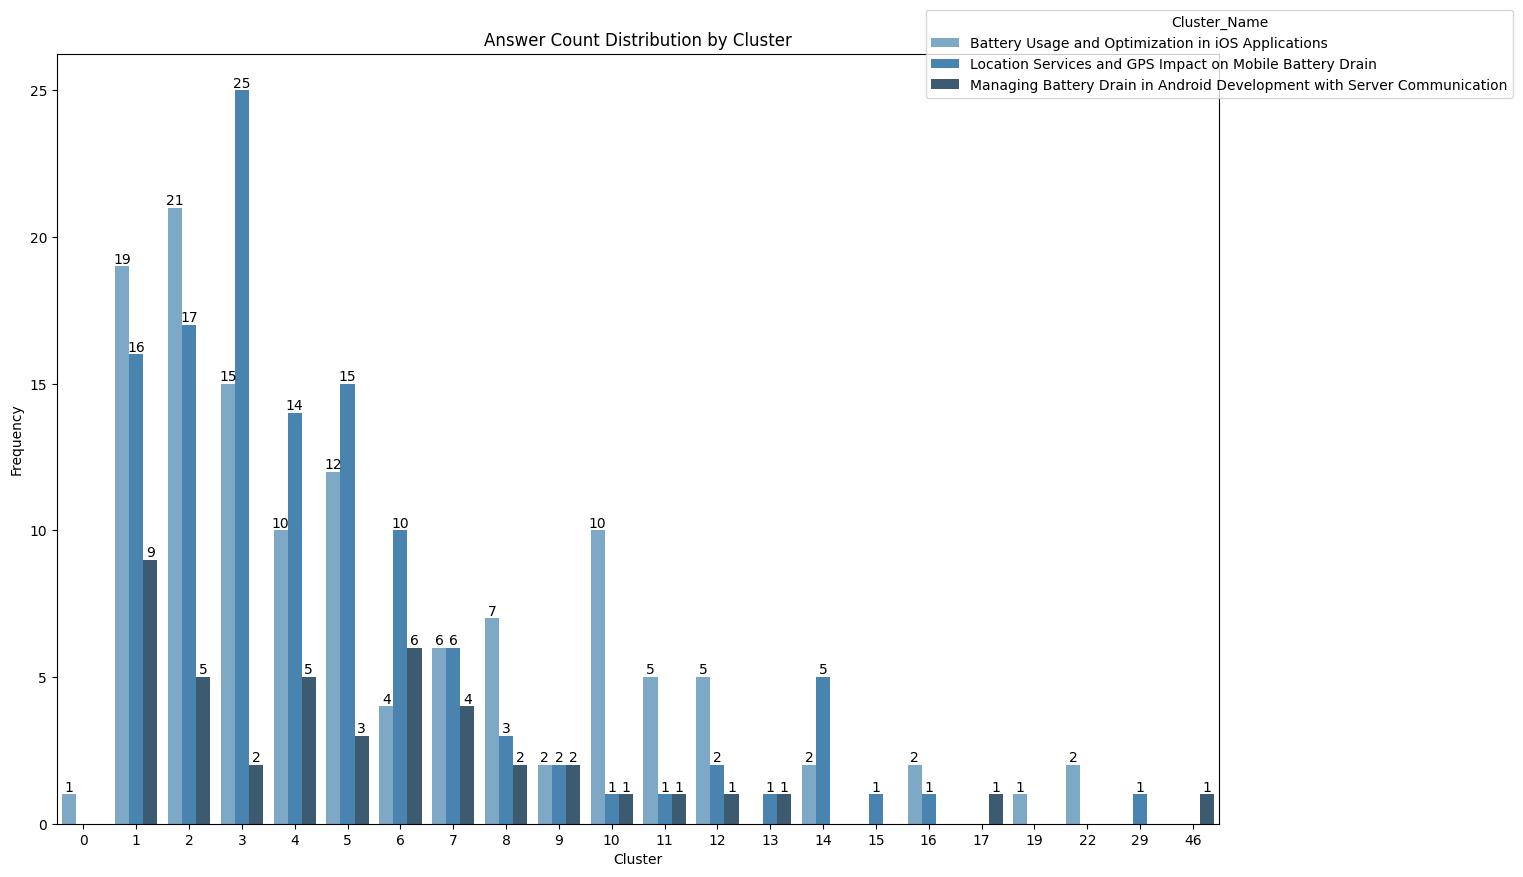

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(15, 10))

ax = sns.barplot(x='all_comment_count', y='count', hue='Cluster_Name', data=answer_count_unique, palette='Blues_d')

plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Answer Count Distribution by Cluster')
sns.move_legend(ax, "center", bbox_to_anchor=(1, 1))

ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)

plt.show()


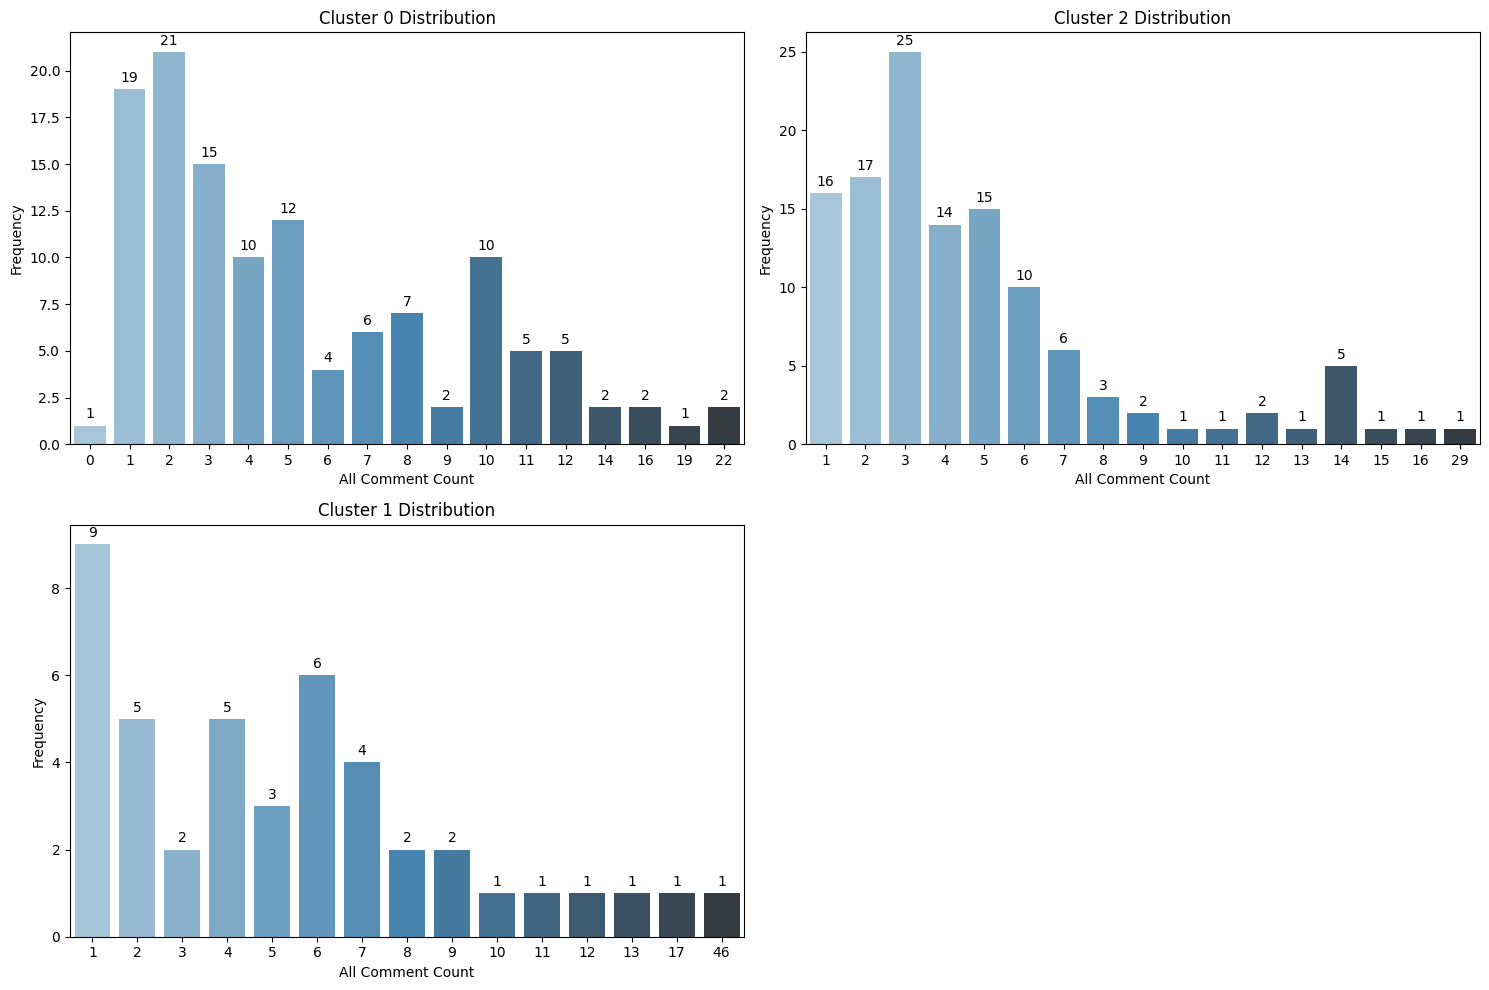

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

clusters = answer_count_unique['Cluster'].unique()

for i, cluster in enumerate(clusters):
    cluster_data = answer_count_unique[answer_count_unique['Cluster'] == cluster]
    count_data = cluster_data.groupby('all_comment_count')['count'].sum()

    # Create barplot
    sns.barplot(
        x=count_data.index,
        y=count_data.values,
        ax=axes[i],
        palette='Blues_d'
    )

    axes[i].set_xlabel('All Comment Count')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Cluster {cluster} Distribution')

    # Add value labels on top of bars
    for p in axes[i].patches:
        axes[i].annotate(
            f'{p.get_height():.0f}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center',
            fontsize=10,
            color='black',
            xytext=(0, 8), textcoords='offset points'
        )

# Hide the last empty subplot
axes[3].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
countttt = result.groupby('Cluster_Name')['all_comment_count'].mean().reset_index()
countttt['cluster'] = [1,0,2]
countttt

,Cluster_Name,all_comment_count,cluster
0,Battery Usage and Optimization in iOS Applicat...,5.516129,1
1,Location Services and GPS Impact on Mobile Bat...,4.859504,0
2,Managing Battery Drain in Android Development ...,6.068182,2


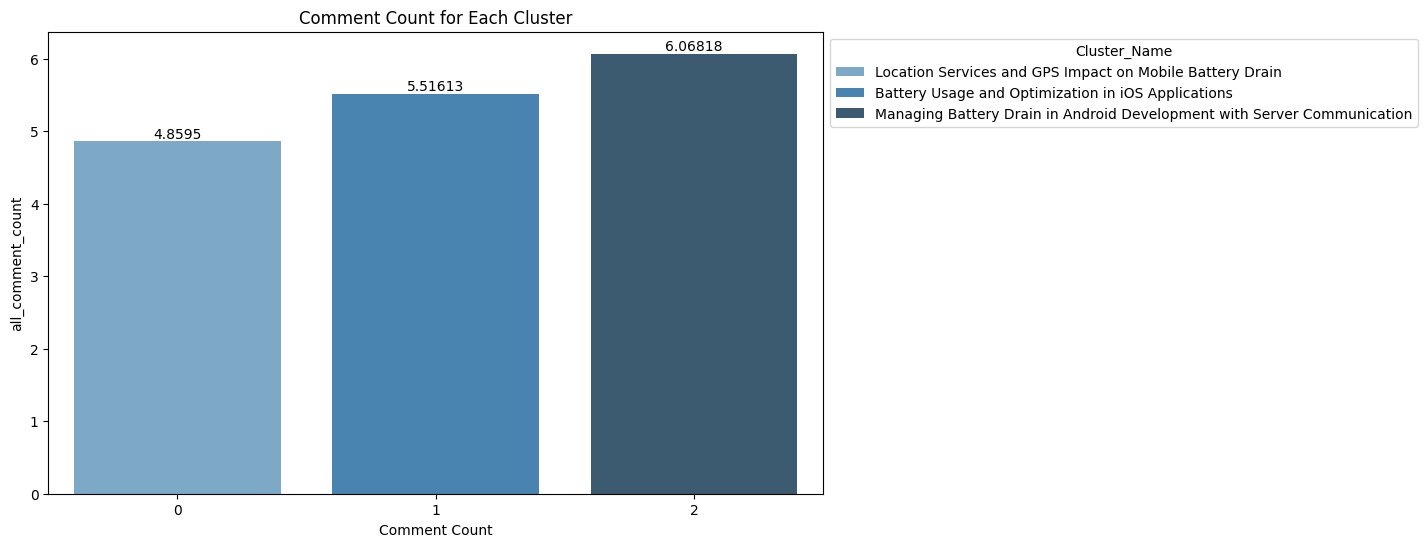

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='cluster', y='all_comment_count', hue = 'Cluster_Name', data=countttt, palette='Blues_d')

plt.xlabel('Comment Count')
plt.title('Comment Count for Each Cluster')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)

plt.show()

In [ ]:
for i in range(3):
  print(f"Cluster {i}: {', '.join(map(str, result[result['Cluster'] == i]['all_comment_count'].unique()))}")

Cluster 0: 2, 1, 3, 0, 12, 5, 11, 4, 10, 8, 7, 14, 6, 9, 16, 22, 19
Cluster 1: 1, 4, 9, 6, 2, 7, 8, 11, 10, 3, 5, 46, 13, 12, 17
Cluster 2: 5, 8, 1, 4, 3, 9, 2, 7, 6, 15, 14, 11, 10, 29, 13, 12, 16


#คนที่มาคอมเมนท์ปัญหาที่ถูกโพสต์ไว้เป็นคน Id หรือ ชื่อ ซ้ำๆหรือป่าวใน Same Cluster (02/20/2025)

In [ ]:
cleaned_data.dtypes

,0
Cluster,int64
Cluster_Name,object
accepted_answer,float64
answer_body,object
answer_comment_count,int64
answer_count,int64
answer_create_date,object
answer_create_date_day,int64
answer_create_date_month,int64
answer_create_date_time,object


In [ ]:
cleaned_data

,Cluster,Cluster_Name,accepted_answer,answer_body,answer_comment_count,answer_count,answer_create_date,answer_create_date_day,answer_create_date_month,answer_create_date_time,...,tag_2_cluster_name,tag_3,tag_3_cluster_name,tag_4,tag_4_cluster_name,tag_5,tag_5_cluster_name,tags,title,view_count
0,2,Location Services and GPS Impact on Mobile Bat...,NaN,<p>As far as I know you can't do that. Browser...,0,1,2015-04-24 14:53:47,24,4,14:53:47,...,Design Elements,refresh,Browser Actions,NaN,NaN,NaN,NaN,browser|background|refresh,Acquiring GPS data from mobile browser,77
1,0,Battery Usage and Optimization in iOS Applicat...,NaN,"<p>service - for background work, receiver for...",1,1,2013-08-28 03:07:58,28,8,03:07:58,...,Entertainment,android-intent,Android Development,android-fragments,Android Development,alarmmanager,Alarm and Alert Systems,android|performance|android-intent|android-fra...,"Activity, service or fragment?",126
2,0,Battery Usage and Optimization in iOS Applicat...,NaN,<p>As per the documentation: </p>\n\n<blockquo...,0,1,2015-06-29 18:23:08,29,6,18:23:08,...,Technology & Software,NaN,NaN,NaN,NaN,NaN,NaN,android|activity-recognition,ActivityRecognitionAPI keeps sending pending i...,104
3,0,Battery Usage and Optimization in iOS Applicat...,NaN,"<p>Try with only <strong>RTC</strong>, because...",0,1,2016-05-02 08:30:23,2,5,08:30:23,...,Android Service Management,alarmmanager,Alarm and Alert Systems,NaN,NaN,NaN,NaN,android|android-service|alarmmanager,AlarmManager RTC_WAKEUP drains battery,794
4,0,Battery Usage and Optimization in iOS Applicat...,NaN,"<p>Ok, turns out the example I was looking at ...",0,1,2015-03-13 07:02:58,13,3,07:02:58,...,Android Development,alarmmanager,Alarm and Alert Systems,android-notifications,Mobile Notifications,NaN,NaN,android|android-studio|alarmmanager|android-no...,AlarmManager with notification not firing,754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,2,Location Services and GPS Impact on Mobile Bat...,12782209.0,<p>You are right: if you run a service that ch...,1,2,2012-10-08 12:55:32,8,10,12:55:32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,smart phone bratinger app,70
936,2,Location Services and GPS Impact on Mobile Bat...,12782209.0,<p>You dont need to run background service to ...,0,2,2012-10-08 13:02:14,8,10,13:02:14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,smart phone bratinger app,70
937,2,Location Services and GPS Impact on Mobile Bat...,30590222.0,"<p>You need to set the desiredAccuracy, distan...",0,1,2015-06-02 07:43:39,2,6,07:43:39,...,Programming Languages,cllocationmanager,Location and Navigation Services,NaN,NaN,NaN,NaN,ios|objective-c|cllocationmanager,startMonitoringSignificantLocationChanges call...,344
938,2,Location Services and GPS Impact on Mobile Bat...,NaN,NaN,0,0,None,0,0,0,...,Programming Languages,location,Location and Navigation Services,NaN,NaN,NaN,NaN,ios|swift|location,"swift iOS , location manager startUpdatingLoca...",287


In [ ]:
df_uniq_ans = cleaned_data.drop_duplicates(subset=['answer_body'], keep='first')

# Identify consecutive duplicates based on 'title' and 'answer_owner_username'
mask = (df_uniq_ans['title'] == df_uniq_ans['title'].shift(-1)) & \
       (df_uniq_ans['answer_owner_username'] == df_uniq_ans['answer_owner_username'].shift(-1))

# Keep only rows where the mask is False (i.e., not consecutive duplicates)
df_uniq_ans = df_uniq_ans[~mask].reset_index(drop=True)

df_uniq_ans

,Cluster,Cluster_Name,accepted_answer,answer_body,answer_comment_count,answer_count,answer_create_date,answer_create_date_day,answer_create_date_month,answer_create_date_time,...,tag_2_cluster_name,tag_3,tag_3_cluster_name,tag_4,tag_4_cluster_name,tag_5,tag_5_cluster_name,tags,title,view_count
0,2,Location Services and GPS Impact on Mobile Bat...,NaN,<p>As far as I know you can't do that. Browser...,0,1,2015-04-24 14:53:47,24,4,14:53:47,...,Design Elements,refresh,Browser Actions,NaN,NaN,NaN,NaN,browser|background|refresh,Acquiring GPS data from mobile browser,77
1,0,Battery Usage and Optimization in iOS Applicat...,NaN,"<p>service - for background work, receiver for...",1,1,2013-08-28 03:07:58,28,8,03:07:58,...,Entertainment,android-intent,Android Development,android-fragments,Android Development,alarmmanager,Alarm and Alert Systems,android|performance|android-intent|android-fra...,"Activity, service or fragment?",126
2,0,Battery Usage and Optimization in iOS Applicat...,NaN,<p>As per the documentation: </p>\n\n<blockquo...,0,1,2015-06-29 18:23:08,29,6,18:23:08,...,Technology & Software,NaN,NaN,NaN,NaN,NaN,NaN,android|activity-recognition,ActivityRecognitionAPI keeps sending pending i...,104
3,0,Battery Usage and Optimization in iOS Applicat...,NaN,"<p>Try with only <strong>RTC</strong>, because...",0,1,2016-05-02 08:30:23,2,5,08:30:23,...,Android Service Management,alarmmanager,Alarm and Alert Systems,NaN,NaN,NaN,NaN,android|android-service|alarmmanager,AlarmManager RTC_WAKEUP drains battery,794
4,0,Battery Usage and Optimization in iOS Applicat...,NaN,"<p>Ok, turns out the example I was looking at ...",0,1,2015-03-13 07:02:58,13,3,07:02:58,...,Android Development,alarmmanager,Alarm and Alert Systems,android-notifications,Mobile Notifications,NaN,NaN,android|android-studio|alarmmanager|android-no...,AlarmManager with notification not firing,754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,2,Location Services and GPS Impact on Mobile Bat...,NaN,"<p>The answer to <a href=""https://stackoverflo...",0,1,2011-02-07 13:48:22,7,2,13:48:22,...,Programming Concepts,background,Design Elements,location,Location and Navigation Services,nstimer,Timing Tools,iphone|multithreading|background|location|nstimer,running an NSTimer in the background of a mult...,2905
465,2,Location Services and GPS Impact on Mobile Bat...,11497565.0,<p>You can user <code>AlarmManager</code> Clas...,2,1,2012-07-16 02:44:46,16,7,02:44:46,...,Android Service Management,NaN,NaN,NaN,NaN,NaN,NaN,android|service,service that will run and stop automatically i...,1243
466,2,Location Services and GPS Impact on Mobile Bat...,12782209.0,<p>You are right: if you run a service that ch...,1,2,2012-10-08 12:55:32,8,10,12:55:32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,smart phone bratinger app,70
467,2,Location Services and GPS Impact on Mobile Bat...,12782209.0,<p>You dont need to run background service to ...,0,2,2012-10-08 13:02:14,8,10,13:02:14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,smart phone bratinger app,70


In [ ]:
# df_uniq_ans = cleaned_data.drop_duplicates(subset=['answer_body'], keep='first')
# # df_uniq_ans = df_uniq_ans.drop_duplicates(subset=['title'], keep='first')
# df_uniq_ans

In [ ]:
# owner_counts = cleaned_data["owner_username"].value_counts().reset_index()
# owner_counts

cluster_counts = df_uniq_ans.groupby(["Cluster_Name", "answer_owner_username"]).size().reset_index(name="count")
cluster_counts

# owner_counts.columns = ["user_name", "count"]

,Cluster_Name,answer_owner_username,count
0,Battery Usage and Optimization in iOS Applicat...,A Koscianski,1
1,Battery Usage and Optimization in iOS Applicat...,AADProgramming,1
2,Battery Usage and Optimization in iOS Applicat...,Aditya,1
3,Battery Usage and Optimization in iOS Applicat...,Afshin,1
4,Battery Usage and Optimization in iOS Applicat...,Ahmed Aeon Axan,1
...,...,...,...
437,Managing Battery Drain in Android Development ...,swiftBoy,1
438,Managing Battery Drain in Android Development ...,user1050755,1
439,Managing Battery Drain in Android Development ...,user2485984,1
440,Managing Battery Drain in Android Development ...,valheru,1


In [ ]:
c0_counts = cluster_counts[cluster_counts['Cluster_Name'] == 'Location Services and GPS Impact on Mobile Battery Drain'][['answer_owner_username','count']]
c1_counts = cluster_counts[cluster_counts['Cluster_Name'] == 'Battery Usage and Optimization in iOS Applications'][['answer_owner_username','count']]
c2_counts = cluster_counts[cluster_counts['Cluster_Name'] == 'Managing Battery Drain in Android Development with Server Communication'][['answer_owner_username','count']]

In [ ]:
c2_counts.count()

,0
answer_owner_username,79
count,79


In [ ]:
c0_counts = c0_counts.sort_values(by="count", ascending=False).head(10)
c1_counts = c1_counts.sort_values(by="count", ascending=False).head(10)
c2_counts = c2_counts.sort_values(by="count", ascending=False).head(10)

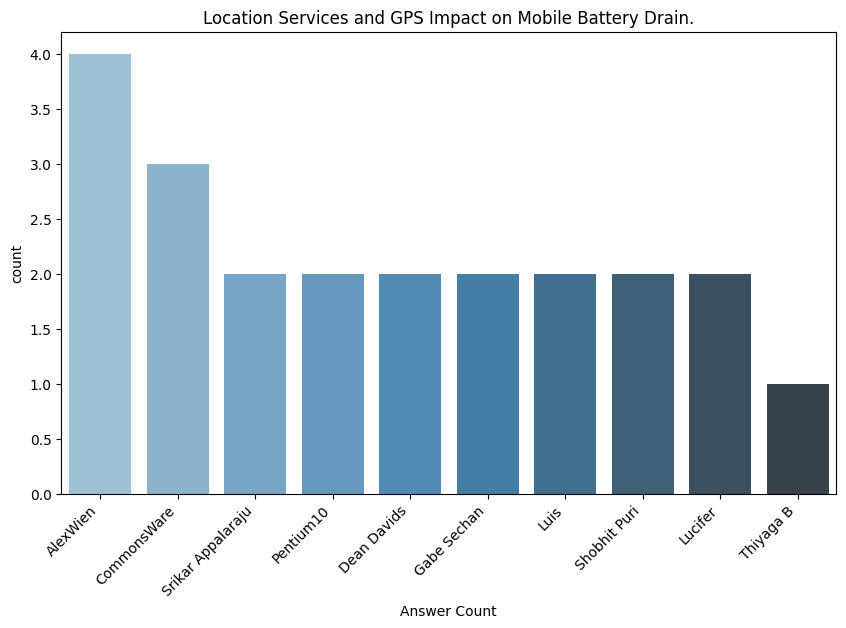

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='answer_owner_username', y='count', data=c0_counts, palette='Blues_d')

plt.xlabel('Answer Count')
plt.title('Location Services and GPS Impact on Mobile Battery Drain.')
plt.xticks(rotation=45, ha="right")

plt.show()

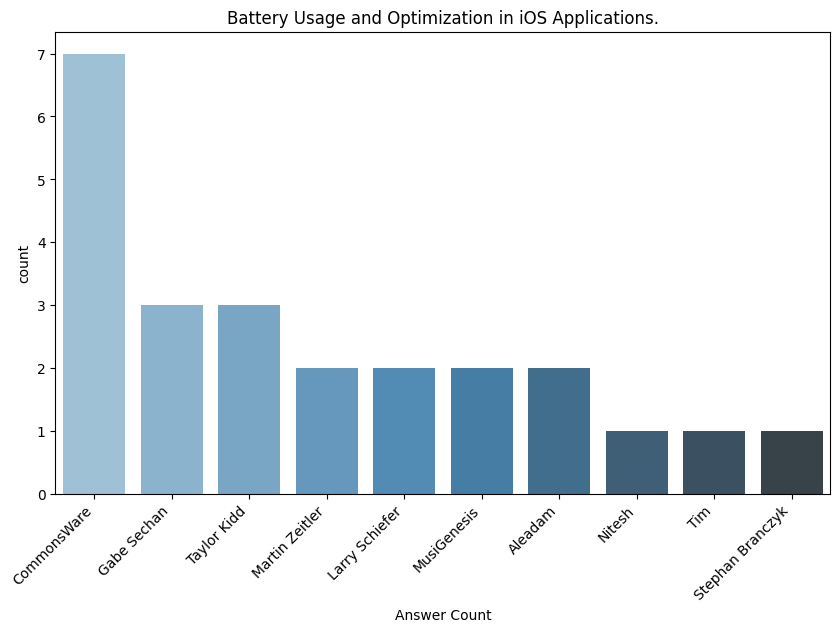

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='answer_owner_username', y='count', data=c1_counts, palette='Blues_d')

plt.xlabel('Answer Count')
plt.title('Battery Usage and Optimization in iOS Applications.')
plt.xticks(rotation=45, ha="right")

plt.show()

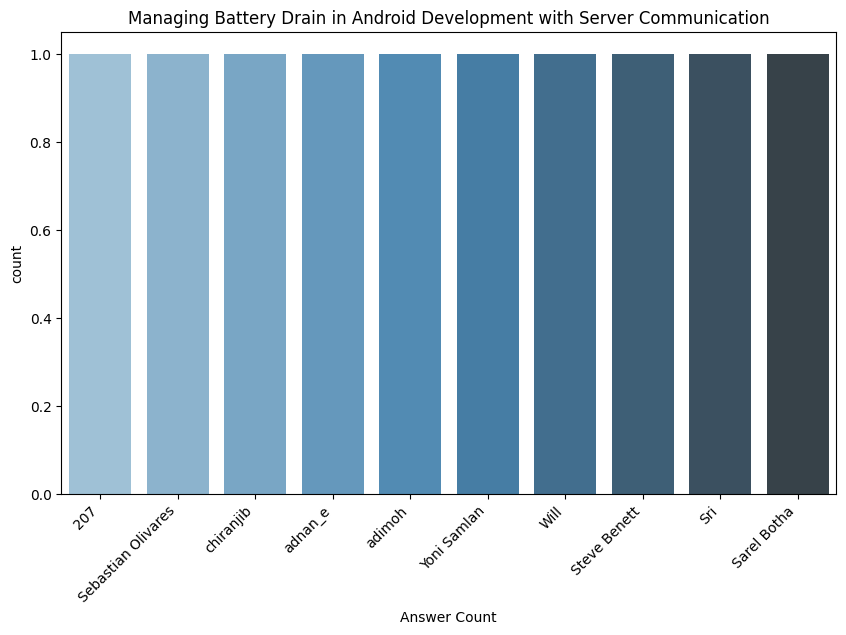

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='answer_owner_username', y='count', data=c2_counts, palette='Blues_d')

plt.xlabel('Answer Count')
plt.title('Managing Battery Drain in Android Development with Server Communication')
plt.xticks(rotation=45, ha="right")

plt.show()

นับรวมของ battery drain (cluster ทั้งหมด)

In [ ]:
cluster_counts = df_uniq_ans.groupby("answer_owner_username").size().reset_index(name="count")
cluster_counts = cluster_counts.sort_values(by="count", ascending=False).head(10)
cluster_counts

,answer_owner_username,count
58,CommonsWare,10
104,Gabe Sechan,5
15,AlexWien,4
64,David Wasser,3
293,Taylor Kidd,3
178,Martin Zeitler,2
341,cgr,2
204,MusiGenesis,2
99,Frank van Puffelen,2
163,Larry Schiefer,2


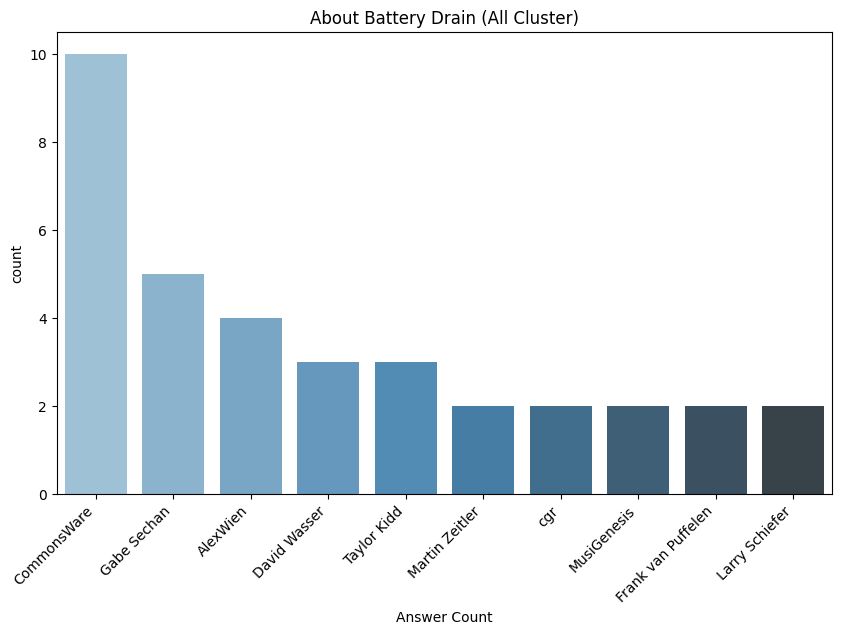

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='answer_owner_username', y='count', data=cluster_counts, palette='Blues_d')

plt.xlabel('Answer Count')
plt.title('About Battery Drain (All Cluster)')
plt.xticks(rotation=45, ha="right")

plt.show()

# Non-Accepted and non Answer Posts

In [ ]:
unique_post = cleaned_data.drop_duplicates(subset=['title'], keep='first')

In [ ]:
non_accept = unique_post[unique_post['answer_count'] > 0]
non_accept['accepted_answer'] = non_accept['accepted_answer'].fillna(0)
non_accept = non_accept[non_accept['accepted_answer'] == 0 ]
non_accept

,Cluster,Cluster_Name,accepted_answer,answer_body,answer_comment_count,answer_count,answer_create_date,answer_create_date_day,answer_create_date_month,answer_create_date_time,...,tag_2_cluster_name,tag_3,tag_3_cluster_name,tag_4,tag_4_cluster_name,tag_5,tag_5_cluster_name,tags,title,view_count
0,2,Location Services and GPS Impact on Mobile Bat...,0.0,<p>As far as I know you can't do that. Browser...,0,1,2015-04-24 14:53:47,24,4,14:53:47,...,Design Elements,refresh,Browser Actions,NaN,NaN,NaN,NaN,browser|background|refresh,Acquiring GPS data from mobile browser,77
1,0,Battery Usage and Optimization in iOS Applicat...,0.0,"<p>service - for background work, receiver for...",1,1,2013-08-28 03:07:58,28,8,03:07:58,...,Entertainment,android-intent,Android Development,android-fragments,Android Development,alarmmanager,Alarm and Alert Systems,android|performance|android-intent|android-fra...,"Activity, service or fragment?",126
2,0,Battery Usage and Optimization in iOS Applicat...,0.0,<p>As per the documentation: </p>\n\n<blockquo...,0,1,2015-06-29 18:23:08,29,6,18:23:08,...,Technology & Software,NaN,NaN,NaN,NaN,NaN,NaN,android|activity-recognition,ActivityRecognitionAPI keeps sending pending i...,104
3,0,Battery Usage and Optimization in iOS Applicat...,0.0,"<p>Try with only <strong>RTC</strong>, because...",0,1,2016-05-02 08:30:23,2,5,08:30:23,...,Android Service Management,alarmmanager,Alarm and Alert Systems,NaN,NaN,NaN,NaN,android|android-service|alarmmanager,AlarmManager RTC_WAKEUP drains battery,794
4,0,Battery Usage and Optimization in iOS Applicat...,0.0,"<p>Ok, turns out the example I was looking at ...",0,1,2015-03-13 07:02:58,13,3,07:02:58,...,Android Development,alarmmanager,Alarm and Alert Systems,android-notifications,Mobile Notifications,NaN,NaN,android|android-studio|alarmmanager|android-no...,AlarmManager with notification not firing,754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,2,Location Services and GPS Impact on Mobile Bat...,0.0,<p>You need to start the significant change no...,0,1,2015-07-20 22:00:08,20,7,22:00:08,...,Design Elements,gps,Location and Navigation Services,location,Location and Navigation Services,NaN,NaN,ios|background|gps|location,ios: How to restart app when it terminated in ...,1155
912,2,Location Services and GPS Impact on Mobile Bat...,0.0,"<p>The <a href=""http://developer.apple.com/lib...",0,2,2012-10-26 07:49:20,26,10,07:49:20,...,Software Development,power-management,Energy Efficiency,NaN,NaN,NaN,NaN,iphone|localization|power-management,iphone - Battery using startMonitoringSignific...,634
915,0,Battery Usage and Optimization in iOS Applicat...,0.0,"<p>How often to you need to execute, and what ...",4,4,2011-07-28 10:33:07,28,7,10:33:07,...,Android Development,service,Android Service Management,keep-alive,Networking Terms,NaN,NaN,java|android|service|keep-alive,keep service alive in android,2494
928,2,Location Services and GPS Impact on Mobile Bat...,0.0,"<p>Using your classes, this is what I would do...",2,1,2013-03-02 05:20:20,2,3,05:20:20,...,Location and Navigation Services,NaN,NaN,NaN,NaN,NaN,NaN,cllocationmanager|cllocation,recieving location updates after app is termin...,10728


In [ ]:
non_ans = unique_post[unique_post['answer_count'] == 0]
non_ans

,Cluster,Cluster_Name,accepted_answer,answer_body,answer_comment_count,answer_count,answer_create_date,answer_create_date_day,answer_create_date_month,answer_create_date_time,...,tag_2_cluster_name,tag_3,tag_3_cluster_name,tag_4,tag_4_cluster_name,tag_5,tag_5_cluster_name,tags,title,view_count
6,0,Battery Usage and Optimization in iOS Applicat...,NaN,NaN,0,0,None,0,0,0,...,Android Development,activity-recognition,Technology & Software,NaN,NaN,NaN,NaN,android|android-googleapiclient|activity-recog...,Android - Activity Recognition best practices,549
8,2,Location Services and GPS Impact on Mobile Bat...,NaN,NaN,0,0,None,0,0,0,...,Location and Navigation Services,battery,Power Management,NaN,NaN,NaN,NaN,android|location|battery,Android - Fused location with balanced profile,188
10,0,Battery Usage and Optimization in iOS Applicat...,NaN,NaN,0,0,None,0,0,0,...,Android Development,multithreading,Programming Concepts,animation,Game Development and Design,NaN,NaN,java|android|multithreading|animation,"Android - Inflate view, runnable or animations...",382
17,0,Battery Usage and Optimization in iOS Applicat...,NaN,NaN,0,0,None,0,0,0,...,Android Development,service,Android Service Management,alarmmanager,Alarm and Alert Systems,sensors,Technology & Electronics,java|android|service|alarmmanager|sensors,Android - read all sensors every X minutes,391
18,0,Battery Usage and Optimization in iOS Applicat...,NaN,NaN,0,0,None,0,0,0,...,Power Management Modes,NaN,NaN,NaN,NaN,NaN,NaN,android|standby,Android 5.0 - how to wake up device display? S...,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,0,Battery Usage and Optimization in iOS Applicat...,NaN,NaN,0,0,None,0,0,0,...,Android Development,NaN,NaN,NaN,NaN,NaN,NaN,android|android-widget,battery draining issue when widget is created ...,144
859,0,Battery Usage and Optimization in iOS Applicat...,NaN,NaN,0,0,None,0,0,0,...,iOS Development,animation,Game Development and Design,bluetooth,Bluetooth Technology,NaN,NaN,ios|iphone|animation|bluetooth,iOS long lasting animations drain battery?,171
909,2,Location Services and GPS Impact on Mobile Bat...,NaN,NaN,0,0,None,0,0,0,...,Design Elements,cllocationmanager,Location and Navigation Services,NaN,NaN,NaN,NaN,ios|background|cllocationmanager,ios - how to keep app running in background on...,249
938,2,Location Services and GPS Impact on Mobile Bat...,NaN,NaN,0,0,None,0,0,0,...,Programming Languages,location,Location and Navigation Services,NaN,NaN,NaN,NaN,ios|swift|location,"swift iOS , location manager startUpdatingLoca...",287


In [ ]:
list_posts_na = cleaned_data.groupby('Cluster')['title'].nunique().reset_index()
list_posts_na.set_index('Cluster', inplace=True)
# list_posts_na.drop(columns=['Cluster'], inplace=True)
list_posts_nonaccept = non_accept.groupby('Cluster')['title'].nunique().reset_index()
list_posts_nonans = non_ans.groupby('Cluster')['title'].nunique().reset_index()
list_posts_na['non_accepted_posts'] = list_posts_nonaccept['title']
list_posts_na['non_ans_posts'] = list_posts_nonans['title']
list_posts_na.rename(columns = {'title':'all_posts'}, inplace = True)
list_posts_na = pd.concat([list_posts[['all_posts', 'accepted_posts']][0:3], list_posts_na[['non_accepted_posts', 'non_ans_posts']]], axis=1).reset_index()
list_posts_na.loc['Total'] = list_posts_na.sum()
list_posts_na['Accepted_percentage'] = (list_posts_na['accepted_posts']/list_posts_na['all_posts'])*100
list_posts_na['Answered_percentage'] = (list_posts_na['non_accepted_posts']/list_posts_na['all_posts'])*100
list_posts_na['Unanswered_percentage'] = (list_posts_na['non_ans_posts']/list_posts_na['all_posts'])*100
list_posts_na.rename(columns = {'accepted_posts':'Accepted_ans','non_accepted_posts':'Answered','non_ans_posts':'Unanswered'}, inplace = True)
list_posts_na

,Cluster,all_posts,Accepted_ans,Answered,Unanswered,Accepted_percentage,Answered_percentage,Unanswered_percentage
0,0,159,56,67,36,35.220126,42.138365,22.641509
1,1,53,25,19,9,47.169811,35.849057,16.981132
2,2,142,57,64,21,40.140845,45.070423,14.788732
Total,3,354,138,150,66,38.983051,42.372881,18.644068


In [ ]:
list_posts_na_plot = list_posts_na.iloc[0:3]
list_posts_na_plot

,Cluster,all_posts,Accepted_ans,Answered,Unanswered,percent_accpeted,percent_non_accpeted,percent_non_answer
0,0,159,56,67,36,35.220126,42.138365,22.641509
1,1,53,25,19,9,47.169811,35.849057,16.981132
2,2,142,57,64,21,40.140845,45.070423,14.788732


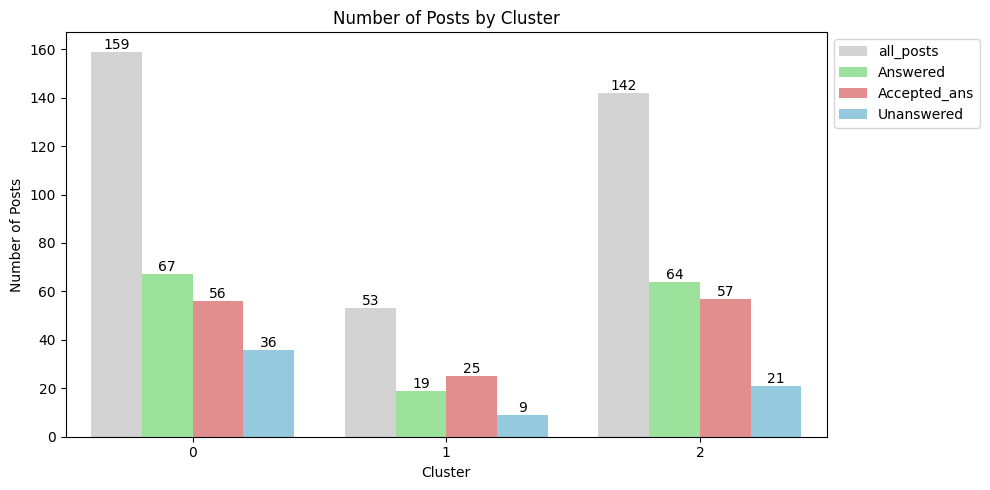

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

melted_posts = list_posts_na_plot.melt(id_vars=['Cluster'],
                                       value_vars=['all_posts', 'Answered', 'Accepted_ans', 'Unanswered'],
                                       var_name='Post_Type', value_name='Number_of_Posts')

sns.barplot(data=melted_posts, x='Cluster', y='Number_of_Posts', hue='Post_Type', palette=['lightGrey', 'lightgreen', 'lightcoral', 'skyblue'])

plt.xlabel("Cluster")
plt.ylabel("Number of Posts")
plt.title("Number of Posts by Cluster")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
Combined_all = pd.concat([list_posts[['all_posts', 'accepted_posts']][0:3], list_posts_na_plot[['non_accepted_posts', 'non_ans_posts']]], axis=1)
Combined_all.loc['Total'] = Combined_all.sum()
Combined_all['Total_Posts'] = Combined_all[['accepted_posts','non_accepted_posts', 'non_ans_posts']].sum(axis=1)
# Combined_all.set_index(['Cluster','all_posts'], inplace=True)
Combined_all

,all_posts,accepted_posts,non_accepted_posts,non_ans_posts,Total_Posts
0,159,56,67,36,159
1,53,25,19,9,53
2,142,57,64,21,142
Total,354,138,150,66,354


#Average Post Length

In [ ]:
def clean_html_and_code(text):
    # Step 1: ลบโค้ดทั้งหมดรวมถึงข้อความภายในโค้ด
    cleaned_text = re.sub(r"<code.*?>.*?</code>", "", text, flags=re.DOTALL)  # ลบโค้ดในแท็ก <code>
    cleaned_text = re.sub(r"```.*?```", "", cleaned_text, flags=re.DOTALL)  # ลบโค้ดที่ใช้ ``` ในข้อความ

    # Step 2: ใช้ BeautifulSoup ลบแท็ก HTML
    soup = BeautifulSoup(cleaned_text, "html.parser")
    cleaned_text = soup.get_text()

    # Step 3: ลบสัญลักษณ์พิเศษ HTML เช่น &amp;, &lt; เป็นต้น
    cleaned_text = re.sub(r"&[a-z]+;", "", cleaned_text)

    cleaned_text = re.sub(r"\d+", "", cleaned_text)  # ลบตัวเลขทั้งหมด

    # Step 4: ลบสัญลักษณ์ที่ไม่จำเป็น (เช่น เครื่องหมายพิเศษ)
    cleaned_text = re.sub(r"[^a-zA-Z0-9\s]", "", cleaned_text)

    # Step 5: ลบช่องว่างที่เกินมา
    cleaned_text = re.sub(r"\s+", " ", cleaned_text)

    # # Step 6: ลบ common words หรือ stop words ที่ไม่มีความหมาย
    # words = cleaned_text.split()  # แยกคำออกจากกัน
    # filtered_words = [word for word in words if word.lower() not in ENGLISH_STOP_WORDS]
    # cleaned_text = " ".join(filtered_words)  # รวมคำที่เหลือกลับมาเป็นข้อความ

    # Step 7: คืนค่าข้อความที่สะอาดขึ้น
    return cleaned_text.strip()

In [ ]:
# unique_post

In [ ]:
unique_post['cleaned_text'] = unique_post['post_body'].apply(lambda x: clean_html_and_code(x))
unique_post['Answer [1] and Unanswered [0]'] = unique_post['answer_count'].apply(lambda x: 1 if x > 0 else 0)
unique_post['w_wo_accept_ans'] = unique_post['accepted_answer'].apply(lambda x: 1 if x > 0 else 0)
unique_post['Accepted_Answered [1] and Answered [0]'] = unique_post.apply(lambda x: '1' if x['w_wo_accept_ans'] == 1 and x['with_and_without_ans'] == 1 else ('0' if x['w_wo_accept_ans'] == 0 and x['with_and_without_ans'] == 1 else 2), axis=1)
# unique_post[['w_wo_ans','w_wo_accept_ans','w_wo_accept_ans_w_ans']]
# unique_post['w_wo_ans']
# unique_post['w_wo_accept_ans']

In [ ]:
unique_post['body_Length'] = unique_post['cleaned_text'].str.split().str.len()
# unique_post.groupby(['Cluster','w_wo_ans'])['body_Length'].mean()
# #0 as without answer and 1 as with answer

In [ ]:
describe_stats = unique_post.groupby(['Cluster', 'Answered [1] and Unanswered [0]'])['body_Length'].describe().loc[:, ['mean', 'min', 'max']]
describe_stats.rename(columns={'mean': 'mean_body_length', 'min': 'min_body_length', 'max': 'max_body_length'}, inplace=True)
describe_stats

mean_body_length  min_body_length  \
Cluster Answered [1] and Unanswered [0]                                      
0       0                                      165.638889             37.0   
        1                                      149.699187             15.0   
1       0                                      180.111111             68.0   
        1                                      183.318182             58.0   
2       0                                      148.285714             66.0   
        1                                      149.735537             20.0   

                                         max_body_length  
Cluster Answered [1] and Unanswered [0]                   
0       0                                          479.0  
        1                                          629.0  
1       0                                          390.0  
        1                                          519.0  
2       0                                          308.0  
        1                                          943.0

In [ ]:
# unique_post.groupby(['Cluster','w_wo_accept_ans'])['body_lenght'].mean()
# #0 as without accepted answer and 1 as with accepted answer

In [ ]:
# unique_post.groupby(['Cluster', 'w_wo_accept_ans'])['body_Length'].describe().loc[:, ['mean', 'min', 'max']]

In [ ]:
describe_stats = unique_post[unique_post['Accepted_Answered [1] and Answered [0]'] != 2].groupby(['Cluster', 'Accepted_Answered [1] and Answered [0]'])['body_Length'].describe().loc[:, ['mean', 'min', 'max']]
describe_stats.rename(columns={'mean': 'mean_body_length', 'min': 'min_body_length', 'max': 'max_body_length'}, inplace=True)
describe_stats

mean_body_length  \
Cluster Accepted_Answered [1] and Answered [0]                     
0       0                                             151.850746   
        1                                             147.125000   
1       0                                             197.947368   
        1                                             172.200000   
2       0                                             137.843750   
        1                                             163.087719   

                                                min_body_length  \
Cluster Accepted_Answered [1] and Answered [0]                    
0       0                                                  42.0   
        1                                                  15.0   
1       0                                                  69.0   
        1                                                  58.0   
2       0                                                  20.0   
        1                                                  36.0   

                                                max_body_length  
Cluster Accepted_Answered [1] and Answered [0]                   
0       0                                                 629.0  
        1                                                 626.0  
1       0                                                 519.0  
        1                                                 372.0  
2       0                                                 709.0  
        1                                                 943.0

In [ ]:
# unique_post[['Cluster','body_Length','w_wo_ans','w_wo_accept_ans']].describe()

#Tags ที่ popular (ไม่ทำแล้ว)

In [ ]:
# cleaned_data['Cluster_Name'].unique()
new_cname = ['Location Services and GPS Impact on Mobile Battery Drain', 'Battery Usage and Optimization in iOS Applications', 'Managing Battery Drain in Android Development with Server Communication']
cleaned_data.replace('The common theme in these posts is issues related to battery drain caused by location services or GPS usage in mobile applications.', 'Location Services and GPS Impact on Mobile Battery Drain', inplace= True)
cleaned_data.replace('Battery usage and power consumption in iOS applications.', 'Battery Usage and Optimization in iOS Applications', inplace= True)
cleaned_data.replace('All the posts are related to Android development, specifically dealing with server communication and concerns about battery drain.', 'Managing Battery Drain in Android Development with Server Communication', inplace= True)

In [ ]:
cleaned_data[['tag_1','tag_2','tag_3','tag_4','tag_5','Cluster_Name']]

,tag_1,tag_2,tag_3,tag_4,tag_5,Cluster_Name
0,browser,background,refresh,NaN,NaN,Location Services and GPS Impact on Mobile Bat...
1,android,performance,android-intent,android-fragments,alarmmanager,Battery Usage and Optimization in iOS Applicat...
2,android,activity-recognition,NaN,NaN,NaN,Battery Usage and Optimization in iOS Applicat...
3,android,android-service,alarmmanager,NaN,NaN,Battery Usage and Optimization in iOS Applicat...
4,android,android-studio,alarmmanager,android-notifications,NaN,Battery Usage and Optimization in iOS Applicat...
...,...,...,...,...,...,...
935,android,NaN,NaN,NaN,NaN,Location Services and GPS Impact on Mobile Bat...
936,android,NaN,NaN,NaN,NaN,Location Services and GPS Impact on Mobile Bat...
937,ios,objective-c,cllocationmanager,NaN,NaN,Location Services and GPS Impact on Mobile Bat...
938,ios,swift,location,NaN,NaN,Location Services and GPS Impact on Mobile Bat...


In [ ]:
unique_tags_per_cluster_1 = cleaned_data.groupby(['Cluster_Name', 'creation_date_year', 'tag_1']).size().reset_index()
unique_tags_per_cluster_2 = cleaned_data.groupby(['Cluster_Name', 'creation_date_year', 'tag_2']).size().reset_index()
unique_tags_per_cluster_3 = cleaned_data.groupby(['Cluster_Name', 'creation_date_year', 'tag_3']).size().reset_index()
unique_tags_per_cluster_4 = cleaned_data.groupby(['Cluster_Name', 'creation_date_year', 'tag_4']).size().reset_index()
unique_tags_per_cluster_5 = cleaned_data.groupby(['Cluster_Name', 'creation_date_year', 'tag_5']).size().reset_index()

In [ ]:
unique_tags_per_cluster_5

,Cluster_Name,creation_date_year,tag_5,0
0,Battery Usage and Optimization in iOS Applicat...,2011,android-alarms,1
1,Battery Usage and Optimization in iOS Applicat...,2011,battery,3
2,Battery Usage and Optimization in iOS Applicat...,2012,power-management,1
3,Battery Usage and Optimization in iOS Applicat...,2012,powermanager,5
4,Battery Usage and Optimization in iOS Applicat...,2012,task,7
...,...,...,...,...
66,Managing Battery Drain in Android Development ...,2015,chat,7
67,Managing Battery Drain in Android Development ...,2015,thread-sleep,3
68,Managing Battery Drain in Android Development ...,2016,backend,1
69,Managing Battery Drain in Android Development ...,2016,stomp,1


In [ ]:
combine_tags = pd.concat([
    unique_tags_per_cluster_1[['Cluster_Name', 'creation_date_year', 'tag_1', 0]].rename(columns={'tag_1': 'tag', 0: 'count'}),
    unique_tags_per_cluster_2[['Cluster_Name', 'creation_date_year', 'tag_2', 0]].rename(columns={'tag_2': 'tag', 0: 'count'}),
    unique_tags_per_cluster_3[['Cluster_Name', 'creation_date_year', 'tag_3', 0]].rename(columns={'tag_3': 'tag', 0: 'count'}),
    unique_tags_per_cluster_4[['Cluster_Name', 'creation_date_year', 'tag_4', 0]].rename(columns={'tag_4': 'tag', 0: 'count'}),
    unique_tags_per_cluster_5[['Cluster_Name', 'creation_date_year', 'tag_5', 0]].rename(columns={'tag_5': 'tag', 0: 'count'})
], ignore_index=True)

combine_tags = combine_tags.groupby(['Cluster_Name', 'creation_date_year', 'tag'], as_index=False)['count'].sum()
combine_tags


,Cluster_Name,creation_date_year,tag,count
0,Battery Usage and Optimization in iOS Applicat...,2008,compact-framework,7
1,Battery Usage and Optimization in iOS Applicat...,2008,power-management,7
2,Battery Usage and Optimization in iOS Applicat...,2009,cocoa-touch,6
3,Battery Usage and Optimization in iOS Applicat...,2009,iphone,6
4,Battery Usage and Optimization in iOS Applicat...,2010,android,3
...,...,...,...,...
632,Managing Battery Drain in Android Development ...,2020,p2p,1
633,Managing Battery Drain in Android Development ...,2020,windows,1
634,Managing Battery Drain in Android Development ...,2022,android,1
635,Managing Battery Drain in Android Development ...,2022,java,1


In [ ]:
clus0 = combine_tags[combine_tags['Cluster_Name']== 'Location Services and GPS Impact on Mobile Battery Drain'].sort_values(by=['creation_date_year','count'], ascending=[True,False]).reset_index(drop = True)
clus1 = combine_tags[combine_tags['Cluster_Name']== 'Battery Usage and Optimization in iOS Applications'].sort_values(by=['creation_date_year','count'], ascending=[True,False]).reset_index(drop = True)
clus2 = combine_tags[combine_tags['Cluster_Name']== 'Managing Battery Drain in Android Development with Server Communication'].sort_values(by=['creation_date_year','count'], ascending=[True,False]).reset_index(drop = True)

In [ ]:
clus1[clus1['tag'] == 'ios']

,Cluster_Name,creation_date_year,tag,count
13,Battery Usage and Optimization in iOS Applicat...,2011,ios,12
54,Battery Usage and Optimization in iOS Applicat...,2012,ios,2
132,Battery Usage and Optimization in iOS Applicat...,2014,ios,1
154,Battery Usage and Optimization in iOS Applicat...,2015,ios,2
197,Battery Usage and Optimization in iOS Applicat...,2017,ios,4
248,Battery Usage and Optimization in iOS Applicat...,2019,ios,1
278,Battery Usage and Optimization in iOS Applicat...,2022,ios,1


In [ ]:
top_tag_year0 = clus0.groupby('creation_date_year').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)
top_tag_year1 = clus1.groupby('creation_date_year').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)
top_tag_year2 = clus2.groupby('creation_date_year').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

In [ ]:
# list(clus0['creation_date_year'].unique())

top 3(เอาที่ค่าซ้ำด้วยของแต่ละปี)

In [ ]:
# clus0.groupby('creation_date_year')['tag'].nunique()

In [ ]:
# clus0[clus0['creation_date_year']== 2010]

In [ ]:
# tag_count = clus0.groupby('creation_date_year')['tag'].nunique().reset_index(name='tag')
# tag_count['tag']

In [ ]:
# def top3_tags(df):
#     # Group by year and tag, summing the counts
#     yearly_tag_counts = df.groupby(['creation_date_year', 'tag'])['count'].sum().reset_index()

#     # Function to get top tags for each year including ties
#     def get_top_with_ties(group):
#         # Sort by count in descending order
#         sorted_group = group.sort_values('count', ascending=False)

#         if len(sorted_group) <= 3:
#             # If there are 3 or fewer tags, return them all
#             return sorted_group
#         else:
#             # Get the count value of the 3rd highest tag
#             third_highest_count = sorted_group.iloc[2]['count']

#             # Keep all tags with count >= third_highest_count
#             return sorted_group[sorted_group['count'] >= third_highest_count]

#     # Apply the function to each year group
#     top_tags = yearly_tag_counts.groupby('creation_date_year').apply(get_top_with_ties).reset_index(drop=True)

#     return top_tags

In [ ]:
## def top3_tags(df):
##   tag_count = df.groupby('creation_date_year')['tag'].nunique().reset_index(name='tag')
##  new_df = tag_count[tag_count['tag'] <= 3]
##  if tag_count['tag'] > 0:
##    for k in range(len(tag_count)):
##      for i in range(len(tag_count['tag'][k])+1):
##        for j in range(len(df)):
##          if df['count'][i] >= df['count'][i+1]:
##            new_df.loc[new_df] = df['count'][i]
##          else :
##            pass
##    return(new_df)

In [ ]:
# new_clus0 = top3_tags(clus0)
# new_clus1 = top3_tags(clus1)
# new_clus2 = top3_tags(clus2)

In [ ]:
# new_clus0